## 1. Creation of Synthetic Data Set

In [1]:
import pandas as pd
import numpy as np
import random
from faker import Faker
fake = Faker()

def generate_product_features(category):
    if category == "Electronics":
        return fake.random_element(["Wi-Fi Enabled", "Bluetooth Connectivity", "4K Ultra HD"])
    elif category == "Clothing":
        return fake.random_element(["100% Cotton", "Slim Fit", "UV Protection"])
    elif category == "Furniture":
        return fake.random_element(["Solid Wood", "Leather Upholstery", "Adjustable Shelves"])
    elif category == "Books":
        return fake.random_element(["Bestseller", "Award-Winning", "Hardcover"])
    elif category == "Toys":
        return fake.random_element(["Educational", "Interactive", "Battery-Powered"])
    else:
        return fake.random_element(["Color: Red", "Size: Large", "Weight: Light"])  # Default for unknown categories

# Define the number of rows in the dataset
num_rows = 5000

# Generate synthetic data for the dataset
data = {
    "Date": pd.date_range(start="2010-01-01", periods=num_rows, freq="D"),
    "Day_of_Week": [d.strftime("%A") for d in pd.date_range(start="2010-01-01", periods=num_rows, freq="D")],
    "Month": [d.strftime("%B") for d in pd.date_range(start="2010-01-01", periods=num_rows, freq="D")],
    "Product_ID": [fake.unique.random_int(min=1000, max=9999) for _ in range(num_rows)],
    "Product_Category": [fake.random_element(["Electronics", "Clothing", "Furniture", "Books", "Toys"]) for _ in range(num_rows)],
    "Product_Price": [round(random.uniform(10, 500), 2) for _ in range(num_rows)],
    "Product_Features": [],
    "Historical_Sales_Quantity": [random.randint(1, 100) for _ in range(num_rows)],
    "Historical_Sales_Revenue": [round(random.uniform(100, 5000), 2) for _ in range(num_rows)],
    "Current_Inventory_Level": [random.randint(0, 200) for _ in range(num_rows)],
    "Reorder_Point": [random.randint(10, 50) for _ in range(num_rows)],
    "Lead_Time": [random.randint(1, 10) for _ in range(num_rows)],
    "Promotion_Type": [fake.random_element(["Discount", "Bundle", "None"]) for _ in range(num_rows)],
    "Customer_Segmentation": [fake.random_element(["Segment1", "Segment2", "Segment3"]) for _ in range(num_rows)],
    "Economic_Indicator": [round(random.uniform(0.5, 2.5), 2) for _ in range(num_rows)],
    "Supplier_Performance": [round(random.uniform(0.1, 0.9), 2) for _ in range(num_rows)],
    "Customer_Rating": [round(random.uniform(1, 5), 2) for _ in range(num_rows)],
    "Stock_Available": [],    # Placeholder for Stock_Available
    "Sales_Quantity": [],     # Placeholder for Sales_Quantity
    "Promotion_Flag": [],     # Placeholder for Promotion_Flag
    "Sales_Revenue": []       # Placeholder for Sales_Revenue
}

# Create a proportional relationship for Stock_Available with Product_Price
data["Stock_Available"] = [int(price * random.uniform(0.5, 1.5)) for price in data["Product_Price"]]

# Create an inverse proportional relationship for Sales_Quantity with Stock_Available
data["Sales_Quantity"] = [int(stock / 10) + random.randint(-10, 10) for stock in data["Stock_Available"]]

# Create a relationship between Sales_Revenue and Historical_Sales_Revenue
data["Sales_Revenue"] = [round(revenue * random.uniform(0.8, 1.2)) for revenue in data["Historical_Sales_Revenue"]]

# Create a relationship between Current_Inventory_Level and Historical_Sales_Quantity
data["Current_Inventory_Level"] = [inventory - quantity for inventory, quantity in zip(data["Current_Inventory_Level"], data["Historical_Sales_Quantity"])]

# Create a relationship between Reorder_Point and Lead_Time
data["Reorder_Point"] = [lead_time * random.uniform(0.5, 1.5) for lead_time in data["Lead_Time"]]

# Create a relationship between Economic_Indicator and Product_Price
data["Product_Price"] = [price * indicator for price, indicator in zip(data["Product_Price"], data["Economic_Indicator"])]

# Create Promotion_Flag based on Promotion_Type
data["Promotion_Flag"] = [1 if promotion_type != "None" else 0 for promotion_type in data["Promotion_Type"]]

# Create a relationship between Customer_Rating and Sales_Revenue
data["Sales_Revenue"] = [round(revenue * (rating / 5)) for revenue, rating in zip(data["Sales_Revenue"], data["Customer_Rating"])]

# Create a relationship between Historical_Sales_Quantity and Customer_Rating
data["Historical_Sales_Quantity"] = [int(100 * rating) + random.randint(-20, 20) for rating in data["Customer_Rating"]]

# Create a relationship between Supplier_Performance and Historical_Sales_Revenue
data["Historical_Sales_Revenue"] = [revenue * supplier_performance for revenue, supplier_performance in zip(data["Historical_Sales_Revenue"], data["Supplier_Performance"])]

# Create a relationship between Product_Price and Product_Category
price_multiplier = {
    "Electronics": 1.2,
    "Clothing": 1.0,
    "Furniture": 1.5,
    "Books": 0.8,
    "Toys": 1.1
}
data["Product_Price"] = [price * price_multiplier[category] for price, category in zip(data["Product_Price"], data["Product_Category"])]

data["Product_Features"] = [generate_product_features(category) for category in data["Product_Category"]]

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Save the dataset to a CSV file
df.to_csv("synthetic_dataset_final.csv", index=False)


        Date Day_of_Week    Month  Product_ID Product_Category  Product_Price  \
0 2010-01-01      Friday  January        4417            Books       65.66080   
1 2010-01-02    Saturday  January        9919      Electronics       95.42880   
2 2010-01-03      Sunday  January        5432             Toys      188.24487   
3 2010-01-04      Monday  January        9295      Electronics      186.79080   
4 2010-01-05     Tuesday  January        4597        Furniture      347.00820   

  Product_Features  Historical_Sales_Quantity  Historical_Sales_Revenue  \
0    Award-Winning                        454                 2266.7850   
1    Wi-Fi Enabled                        221                  197.9700   
2      Educational                        395                 1912.8458   
3      4K Ultra HD                        467                  218.4897   
4       Solid Wood                        284                 1624.5333   

   Current_Inventory_Level  ...  Lead_Time  Promotion_Type  \


## 2. Preprocessing of Data

In [411]:
import pandas as pd

# Load the data into a pandas DataFrame
data = pd.read_csv('synthetic_dataset_final.csv') 

# Step 1: Handle Missing Data
# Drop rows with missing values for simplicity
data.dropna(inplace=True)

# Step 2: Data Type Conversion
data['Date'] = pd.to_datetime(data['Date'])
data

Date Day_of_Week      Month  Product_ID Product_Category  \
0    2010-01-01      Friday    January        4417            Books   
1    2010-01-02    Saturday    January        9919      Electronics   
2    2010-01-03      Sunday    January        5432             Toys   
3    2010-01-04      Monday    January        9295      Electronics   
4    2010-01-05     Tuesday    January        4597        Furniture   
...         ...         ...        ...         ...              ...   
4995 2023-09-05     Tuesday  September        5739            Books   
4996 2023-09-06   Wednesday  September        9663            Books   
4997 2023-09-07    Thursday  September        7307        Furniture   
4998 2023-09-08      Friday  September        2745         Clothing   
4999 2023-09-09    Saturday  September        3002            Books   

      Product_Price    Product_Features  Historical_Sales_Quantity  \
0          65.66080       Award-Winning                        454   
1          95.42880       Wi-Fi Enabled                        221   
2         188.24487         Educational                        395   
3         186.79080         4K Ultra HD                        467   
4         347.00820          Solid Wood                        284   
...             ...                 ...                        ...   
4995      462.32928           Hardcover                        265   
4996      436.55192       Award-Winning                        139   
4997      385.24410  Leather Upholstery                        340   
4998      111.55200       UV Protection                        499   
4999      670.59840       Award-Winning                        437   

      Historical_Sales_Revenue  Current_Inventory_Level  ...  Lead_Time  \
0                    2266.7850                      124  ...          4   
1                     197.9700                       15  ...          4   
2                    1912.8458                      129  ...          1   
3                     218.4897                      -46  ...          4   
4                    1624.5333                      -11  ...          6   
...                        ...                      ...  ...        ...   
4995                  468.6165                      -49  ...          1   
4996                  826.2036                      -14  ...          8   
4997                   32.9546                       61  ...          7   
4998                 2614.7220                       94  ...          3   
4999                  114.1140                      -49  ...          7   

      Promotion_Type Customer_Segmentation Economic_Indicator  \
0               None              Segment1               0.71   
1           Discount              Segment2               1.80   
2             Bundle              Segment1               0.53   
3               None              Segment3               0.74   
4               None              Segment1               0.58   
...              ...                   ...                ...   
4995            None              Segment1               2.04   
4996        Discount              Segment2               2.17   
4997            None              Segment2               2.39   
4998          Bundle              Segment2               0.64   
4999        Discount              Segment2               2.12   

      Supplier_Performance  Customer_Rating  Stock_Available  Sales_Quantity  \
0                     0.87             4.46               74               3   
1                     0.10             2.08               54              -2   
2                     0.58             4.03              346              35   
3                     0.13             4.81              133              13   
4                     0.39             2.77              475              49   
...                    ...              ...              ...             ...   
4995                  0.45             2.79              327              3

In [412]:
# Step 3: Encoding Categorical Data
day_mapping = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7
}

# Map day names to numbers
data["Day_of_Week"] = data["Day_of_Week"].map(day_mapping)

month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

# Map month names to numbers
data["Month"] = data["Month"].map(month_mapping)
data.head(10)
# Now, the "Month" column contains numeric values from 1 to 12.


Date  Day_of_Week  Month  Product_ID Product_Category  Product_Price  \
0 2010-01-01            5      1        4417            Books       65.66080   
1 2010-01-02            6      1        9919      Electronics       95.42880   
2 2010-01-03            7      1        5432             Toys      188.24487   
3 2010-01-04            1      1        9295      Electronics      186.79080   
4 2010-01-05            2      1        4597        Furniture      347.00820   
5 2010-01-06            3      1        7846         Clothing      733.02690   
6 2010-01-07            4      1        5613        Furniture      579.85275   
7 2010-01-08            5      1        6960        Furniture       37.42200   
8 2010-01-09            6      1        4771            Books      491.30944   
9 2010-01-10            7      1        1122        Furniture     1499.89800   

     Product_Features  Historical_Sales_Quantity  Historical_Sales_Revenue  \
0       Award-Winning                        454                 2266.7850   
1       Wi-Fi Enabled                        221                  197.9700   
2         Educational                        395                 1912.8458   
3         4K Ultra HD                        467                  218.4897   
4          Solid Wood                        284                 1624.5333   
5         100% Cotton                        330                 2918.2492   
6  Adjustable Shelves                        146                 1442.6640   
7  Adjustable Shelves                        183                  986.7453   
8          Bestseller                        239                 1356.7254   
9          Solid Wood                        199                 2261.1162   

   Current_Inventory_Level  ...  Lead_Time  Promotion_Type  \
0                      124  ...          4            None   
1                       15  ...          4        Discount   
2                      129  ...          1          Bundle   
3                      -46  ...          4            None   
4                      -11  ...          6            None   
5                       22  ...          4            None   
6                       54  ...          8        Discount   
7                      -28  ...          1          Bundle   
8                       94  ...          9            None   
9                      127  ...          5          Bundle   

  Customer_Segmentation Economic_Indicator  Supplier_Performance  \
0              Segment1               0.71                  0.87   
1              Segment2               1.80                  0.10   
2              Segment1               0.53                  0.58   
3              Segment3               0.74                  0.13   
4              Segment1               0.58                  0.39   
5              Segment1               2.01                  0.74   
6              Segment3               2.05                  0.60   
7              Segment1               1.65                  0.87   
8              Segment2               1.84                  0.38   
9              Segment2               2.23                  0.46   

   Customer_Rating  Stock_Available  Sales_Quantity  Promotion_Flag  \
0             4.46               74               3               0   
1             2.08               54              -2               1   
2             4.03              346              35               1   
3             4.81              133              13               0   
4             2.77              475              49               0   
5             3.44              531              51               0   
6             1.43              216              25               1   
7             1.80               18               2               1   
8             2.21              393              43               0   
9             2.03              423              44               1   

   Sales_Revenue  
0           2226  
1            693

In [413]:

# Step 5: Scale or Normalize Numerical Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = ['Product_Price', 'Historical_Sales_Quantity', 'Historical_Sales_Revenue', 'Current_Inventory_Level', 'Reorder_Point', 'Lead_Time', 'Economic_Indicator', 'Supplier_Performance', 'Customer_Rating', 'Stock_Available', 'Sales_Quantity', 'Sales_Revenue']

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Step 8: Normalize Date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day_of_Week'] = data['Date'].dt.dayofweek

# Step 9: Drop Unnecessary Columns
columns_to_drop = ['Product_Features']  # Add more columns to drop as needed
data.drop(columns=columns_to_drop, inplace=True)

# Step 10: saving the file in a separate csv for proper file reference
data.to_csv('preprocessed_data.csv', index=False)  

## 3. Importing data from preprocessing.csv

In [414]:
df=pd.read_csv("preprocessed_data.csv")
df.head(10)

Date  Day_of_Week  Month  Product_ID Product_Category  Product_Price  \
0  2010-01-01            4      1        4417            Books       0.032559   
1  2010-01-02            5      1        9919      Electronics       0.049046   
2  2010-01-03            6      1        5432             Toys       0.100452   
3  2010-01-04            0      1        9295      Electronics       0.099647   
4  2010-01-05            1      1        4597        Furniture       0.188382   
5  2010-01-06            2      1        7846         Clothing       0.402177   
6  2010-01-07            3      1        5613        Furniture       0.317342   
7  2010-01-08            4      1        6960        Furniture       0.016920   
8  2010-01-09            5      1        4771            Books       0.268303   
9  2010-01-10            6      1        1122        Furniture       0.826905   

   Historical_Sales_Quantity  Historical_Sales_Revenue  \
0                   0.851598                  0.509274   
1                   0.319635                  0.041585   
2                   0.716895                  0.429260   
3                   0.881279                  0.046224   
4                   0.463470                  0.364083   
5                   0.568493                  0.656548   
6                   0.148402                  0.322968   
7                   0.232877                  0.219900   
8                   0.360731                  0.303540   
9                   0.269406                  0.507992   

   Current_Inventory_Level  Reorder_Point  ...  Promotion_Type  \
0                 0.750842       0.123365  ...            None   
1                 0.383838       0.239228  ...        Discount   
2                 0.767677       0.068796  ...          Bundle   
3                 0.178451       0.175082  ...            None   
4                 0.296296       0.409927  ...            None   
5                 0.407407       0.169172  ...            None   
6                 0.515152       0.473202  ...        Discount   
7                 0.239057       0.005926  ...          Bundle   
8                 0.649832       0.380637  ...            None   
9                 0.760943       0.169087  ...          Bundle   

  Customer_Segmentation Economic_Indicator  Supplier_Performance  \
0              Segment1              0.105                0.9625   
1              Segment2              0.650                0.0000   
2              Segment1              0.015                0.6000   
3              Segment3              0.120                0.0375   
4              Segment1              0.040                0.3625   
5              Segment1              0.755                0.8000   
6              Segment3              0.775                0.6250   
7              Segment1              0.575                0.9625   
8              Segment2              0.670                0.3500   
9              Segment2              0.865                0.4500   

   Customer_Rating  Stock_Available  Sales_Quantity  Promotion_Flag  \
0           0.8650         0.094134        0.141304               0   
1           0.2700         0.066849        0.086957               1   
2           0.7575         0.465211        0.489130               1   
3           0.9525         0.174625        0.250000               0   
4           0.4425         0.641201        0.641304               0   
5           0.6100         0.717599        0.663043               0   
6           0.1075         0.287858        0.380435               1   
7           0.2000         0.017735        0.130435               1   
8           0.3025         0.529332        0.576087               0   
9           0.2575         0.570259        0.586957               1   

   Sales_Revenue  Year  
0       0.394779  2010  
1       0.120687  2010  
2       0.543894  2010  
3       0.300018  2010  
4       0.396746  2010  
5       0.480780  2010  
6       0.136957  2010  
7       0.073306  20

## 4. Visualisations

In [53]:
plt.style.available
plt.style.use('ggplot')

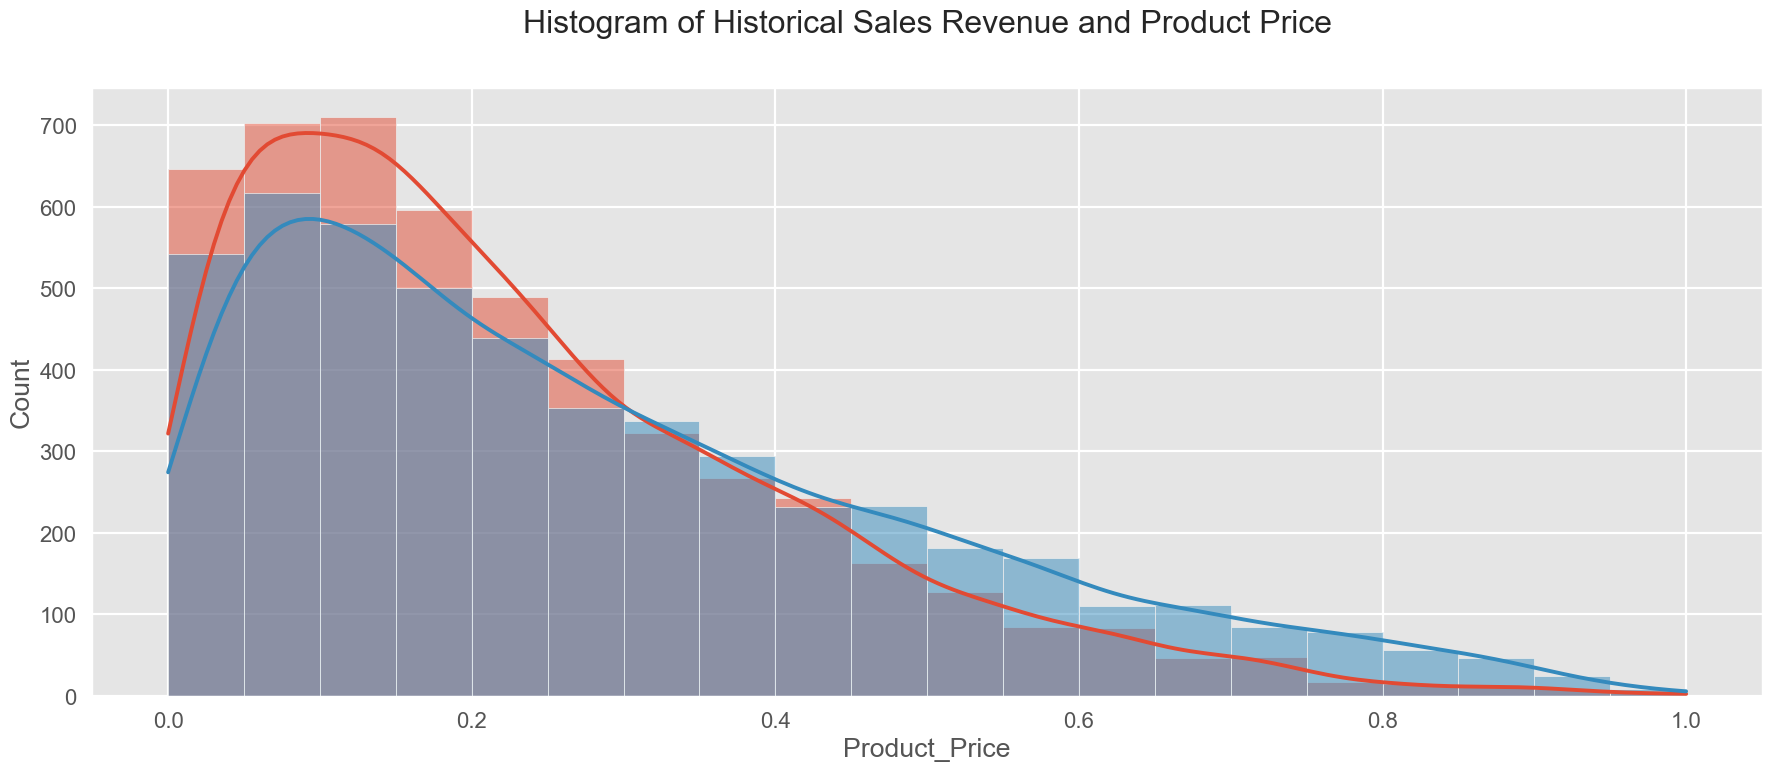

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ["Product_Price", "Historical_Sales_Revenue"]

plt.figure(figsize=(18, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.plot(1, len(numerical_columns), i)
    sns.histplot(df[col], bins=20, kde=True)

plt.title(f'Histogram of Historical Sales Revenue and Product Price',pad=40)
plt.tight_layout()

print()
plt.show()

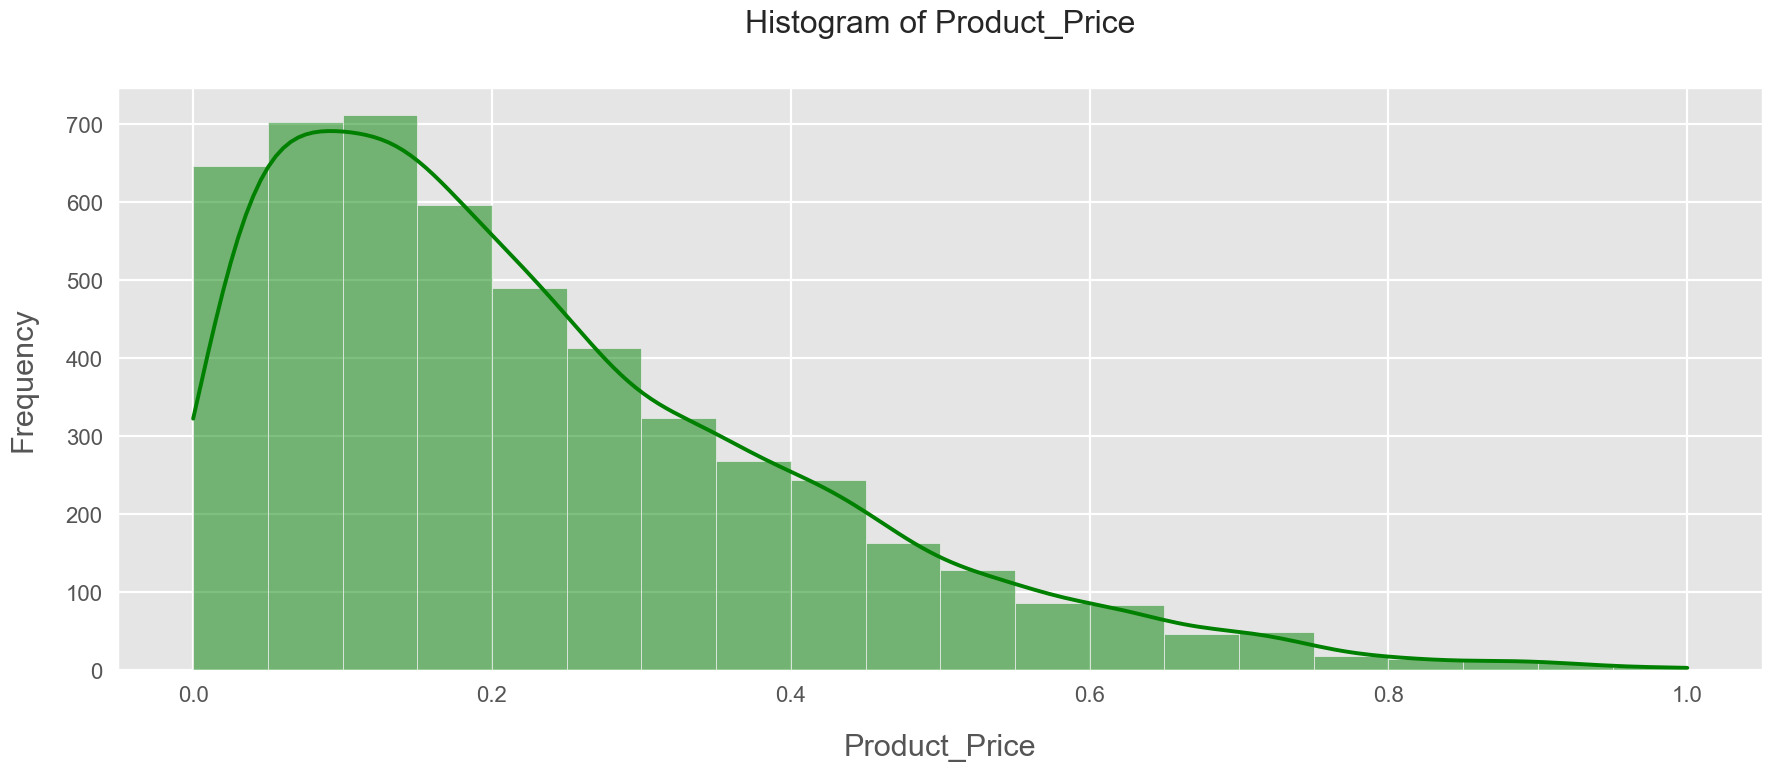

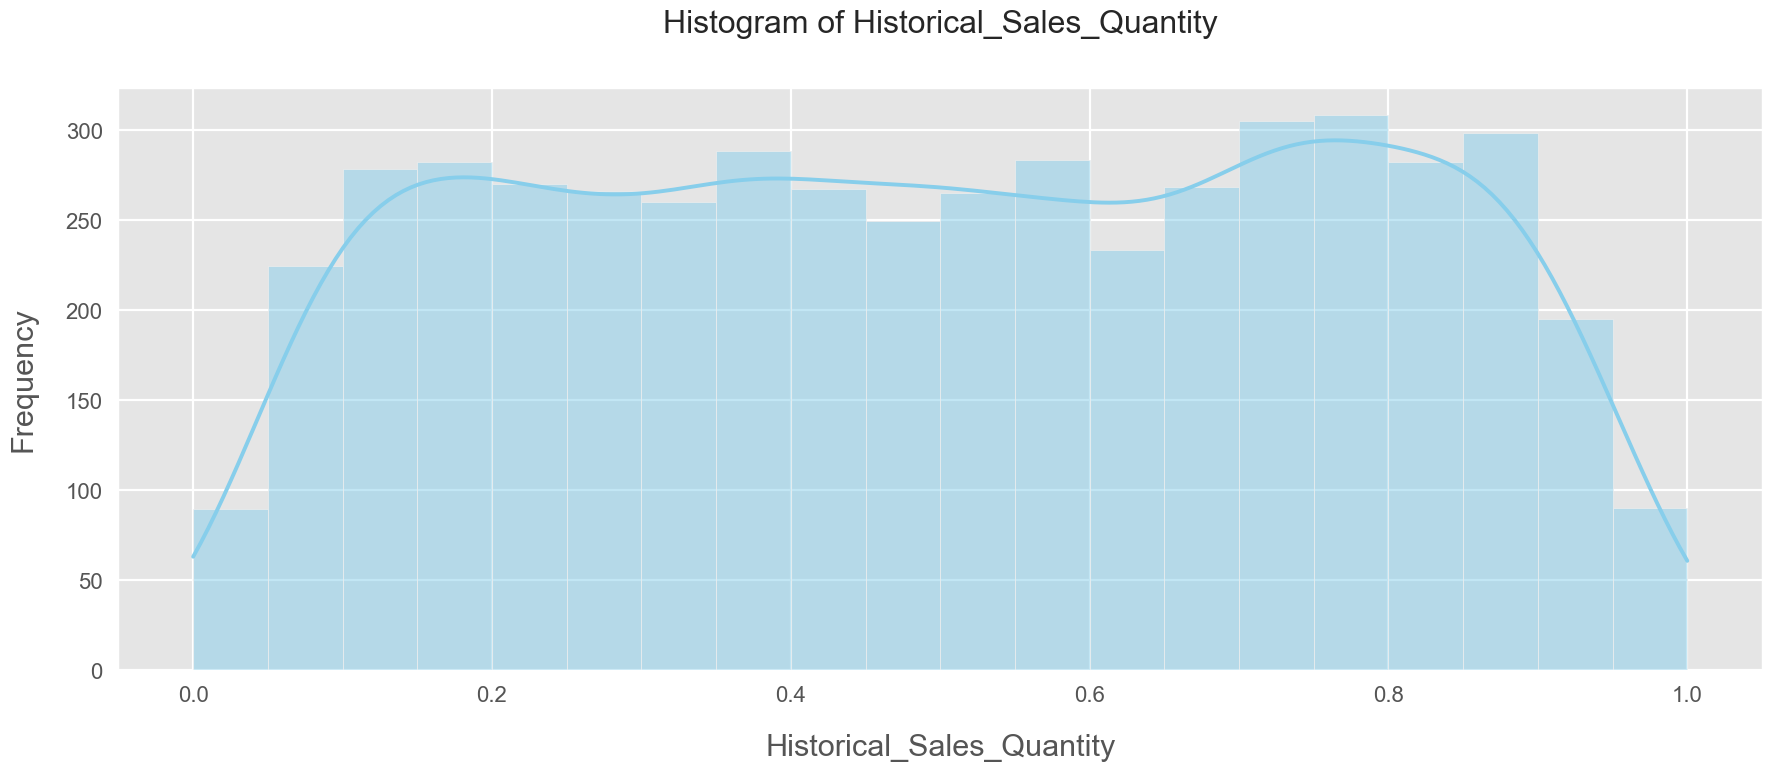

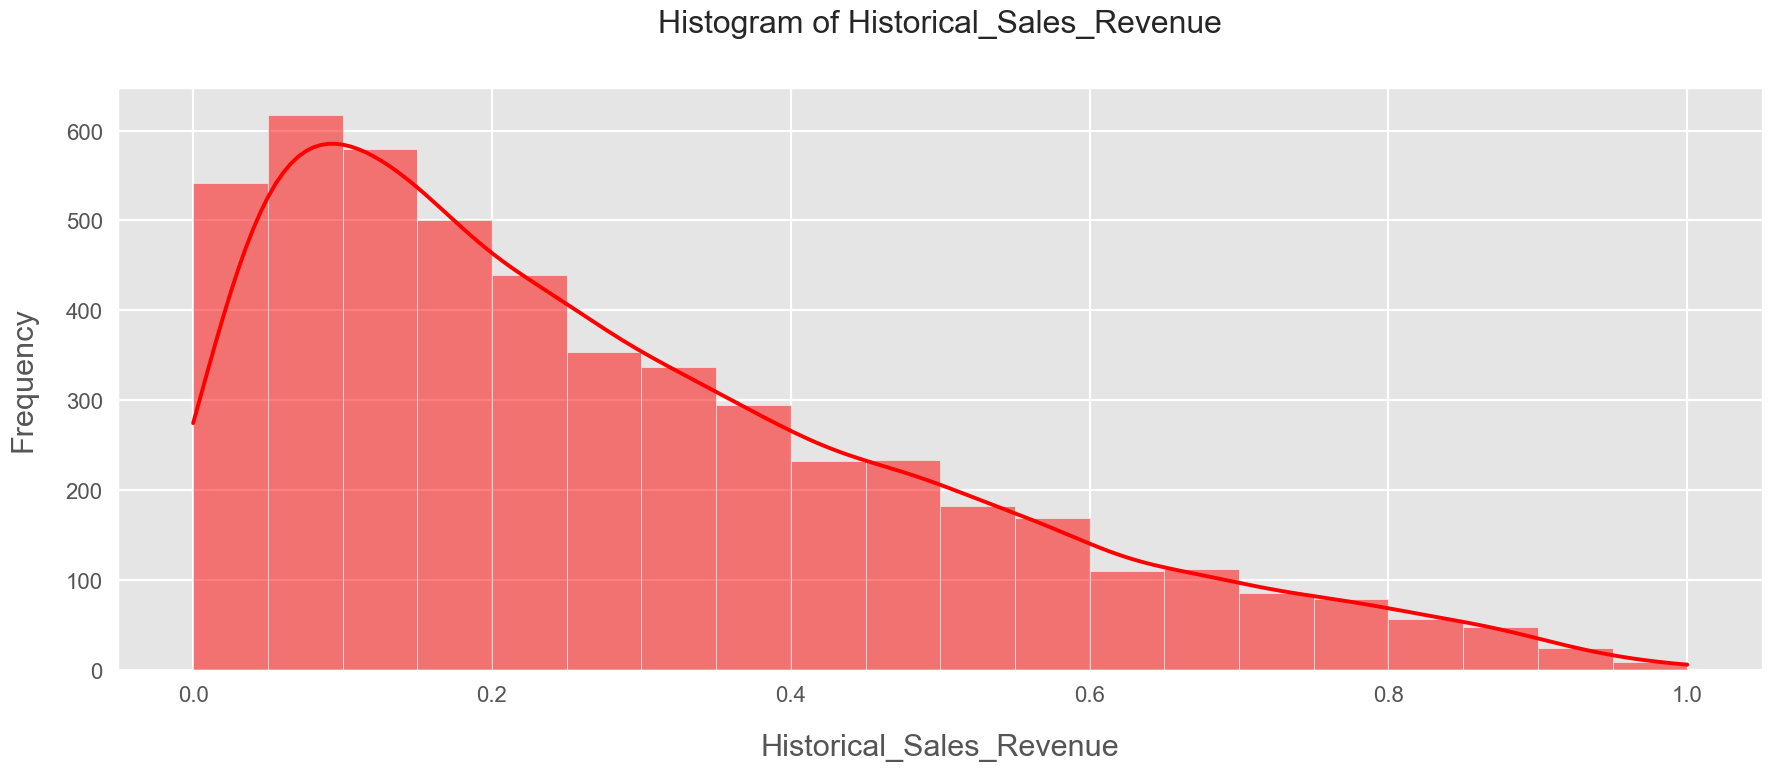

In [95]:
plt.rcParams.update({'font.size': 16})

histogram_color = ['green','skyblue','red']

numerical_columns = ["Product_Price", "Historical_Sales_Quantity", "Historical_Sales_Revenue"]
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(18, 8))
    sns.histplot(df[col], bins=20, kde=True,color=histogram_color[i])
    plt.title(f'Histogram of {col}',pad=40)
    plt.xlabel(col,fontsize=22,labelpad=20)
    plt.ylabel('Frequency',fontsize=22,labelpad=20)
    plt.tight_layout()
    print()
    plt.show()

### Inference on histogram 1 (Product price - Frequency)
* The inventory is mostly made up of low-priced items. The peak of the distribution is around 400, which suggests that most of the items in the inventory are priced below 400.

* There are fewer high-priced items in the inventory. 

* The tail of the distribution extends to 1000 which suggests that there are a few items in the inventory that are priced above 1000.The inventory is not evenly distributed across price ranges. 

* There are more items in the lower price ranges than in the higher price ranges.


### Inference on histogram 2 (Historical_Sales_Quantity - Frequency)
* The company has sold a relatively consistent number of units over time. The distribution is fairly symmetric, with no major outliers. This suggests that the company has not experienced any major fluctuations in sales volume.
* The company has sold more units in the past few years. The peak of the distribution is around 2020, which suggests that the company has sold more units in recent years than in previous years.
* The company has sold a wide range of unit quantities. The tail of the distribution extends to 500 units, which suggests that the company has sold a few units in large quantities.

### Inference on histogram 3 (Historical_Sales_Revenue - Frequency)
* The company has never sold more than 1,000,000 in a single year.
* The company has sold more than 4,00,00,000 in 6 of the 8 years represented in the histogram.



Overall, the histogram shows that the company has a relatively stable sales revenue over time. However, there is a small number of years where the company has sold significantly more revenue than usual. This could be due to a number of factors, such as new product launches, marketing campaigns, or changes in the economy.

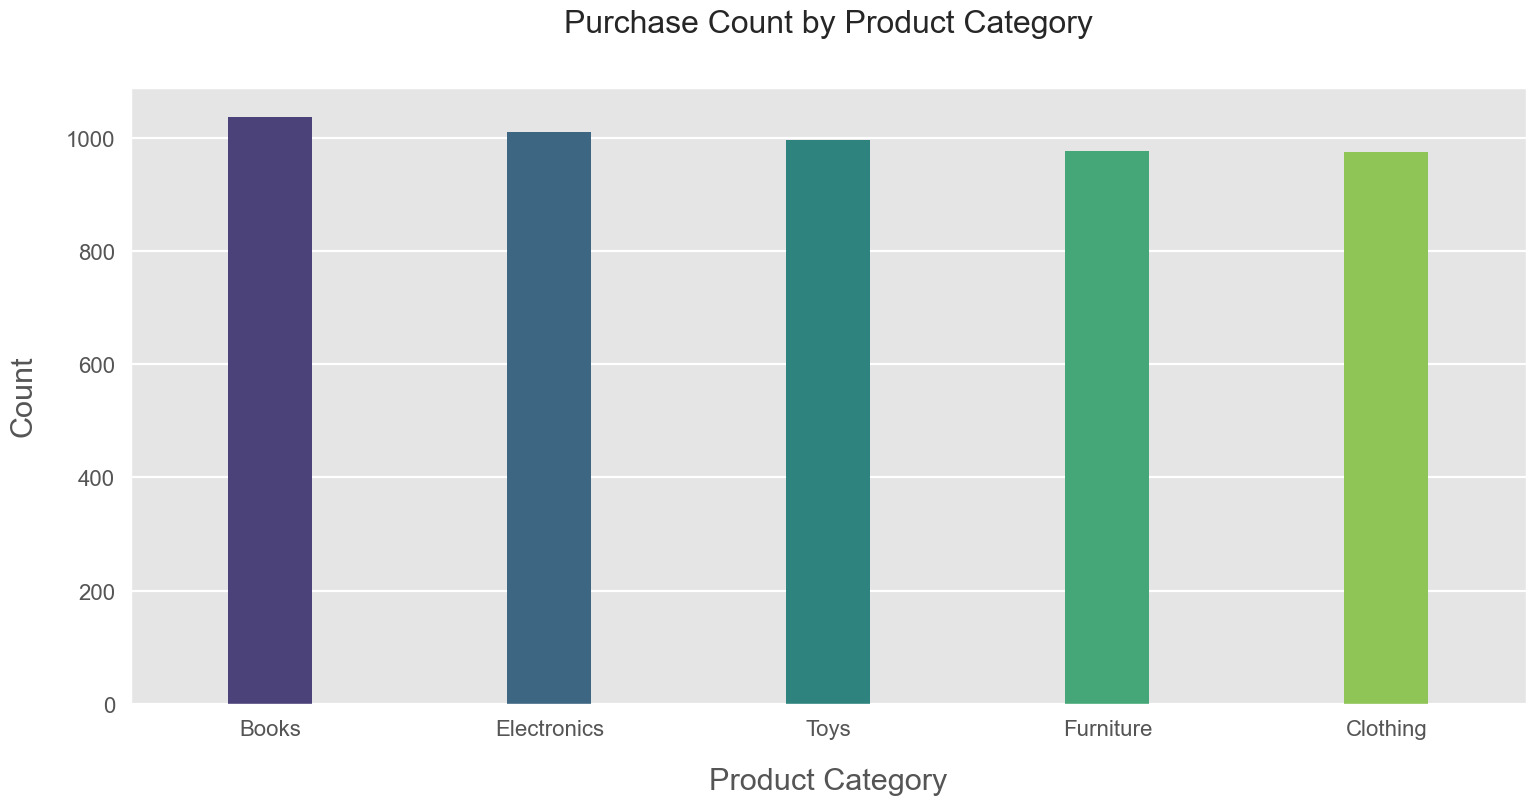

In [141]:
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Product_Category', palette='viridis',dodge=0.6,width=0.3)  
plt.title('Purchase Count by Product Category',pad=40)
plt.xlabel('Product Category',fontsize=22,labelpad=20)
plt.ylabel('Count',fontsize=22,labelpad=20)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
print()
plt.show()

### Inference on Barplot 1 (Product Category - Count)
* The Books category is more popular than the other categories.
* The Toys and Furniture categories are about equally popular.
* The Clothing category is the least popular category.
* There is a small number of purchases in the Electronics category.

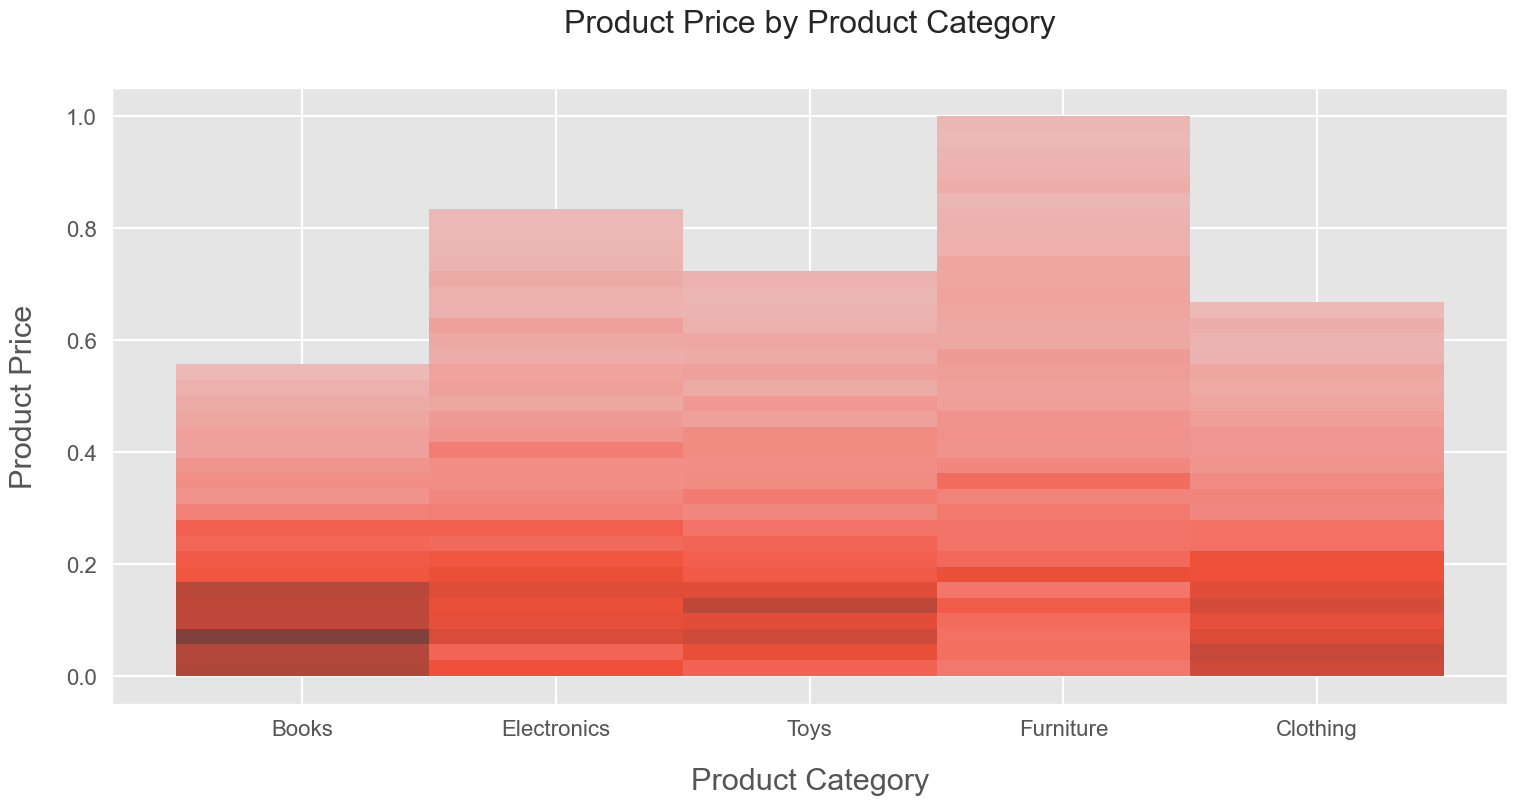

In [152]:
plt.figure(figsize=(18,8))
sns.histplot(data=df,x='Product_Category',y='Product_Price',kde=True)
plt.xlabel('Product Category',fontsize=22,labelpad=20)
plt.ylabel('Product Price',fontsize=22,labelpad=20)
plt.title('Product Price by Product Category',pad=40)
print()
plt.show()

### Inference on histogram 4 (Product Category - Product Price)
* The Electronics category is the most expensive category.
* The Toys and Furniture categories are about equally expensive.
* The Books category is less expensive than the other categories.
* The Clothing category is the least expensive category.

we can also infer that since the price of the book is lesser than that of the price of all the available goods it could be one of the reasons why it is popular in the store.

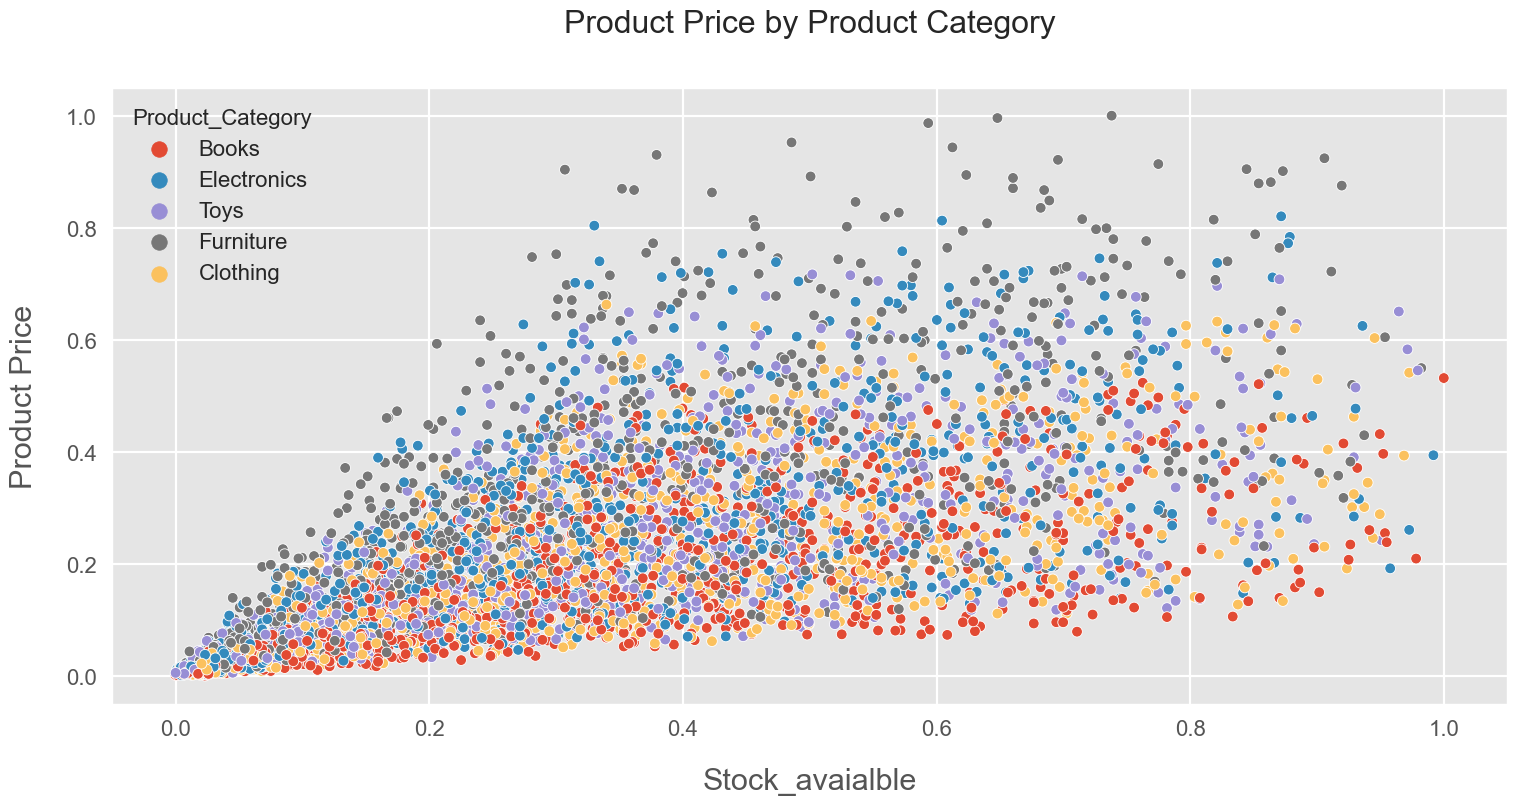

In [186]:
#stock available vs Product Price
plt.figure(figsize=(18,8))
sns.scatterplot(data=df, x='Stock_Available', y='Product_Price', hue='Product_Category', s=60)
plt.xlabel('Stock_avaialble',fontsize=22,labelpad=20)
plt.ylabel('Product Price',fontsize=22,labelpad=20)
plt.title('Product Price by Stock Available',pad=40)
print()
plt.show()

### Inference on ScatterPlot 1 (Product Price - Stock Available)
* The scatter plot shows that there is a positive correlation between product price and product category. This means that, in general, products in higher-priced categories are also more likely to be in stock. However, there are some exceptions to this trend. For example, some products in the Electronics category are not in stock, and some products in the Clothing category are in stock.

* The scatter plot also shows that there is a lot of variation in the price of products within each category. For example, there are some products in the Toys category that are very expensive, and some products that are very cheap. This suggests that there are many factors that can affect the price of a product, such as the brand, the quality, and the features.

* The stock availability of products also varies within each category. For example, some products in the Furniture category are in stock, and some are not. This suggests that the stock availability of a product can depend on a number of factors, such as the popularity of the product, the time of year, and the supply chain.

Overall, the scatter plot shows that there is a positive correlation between product price and product category. However, there is also a lot of variation in the price of products within each category

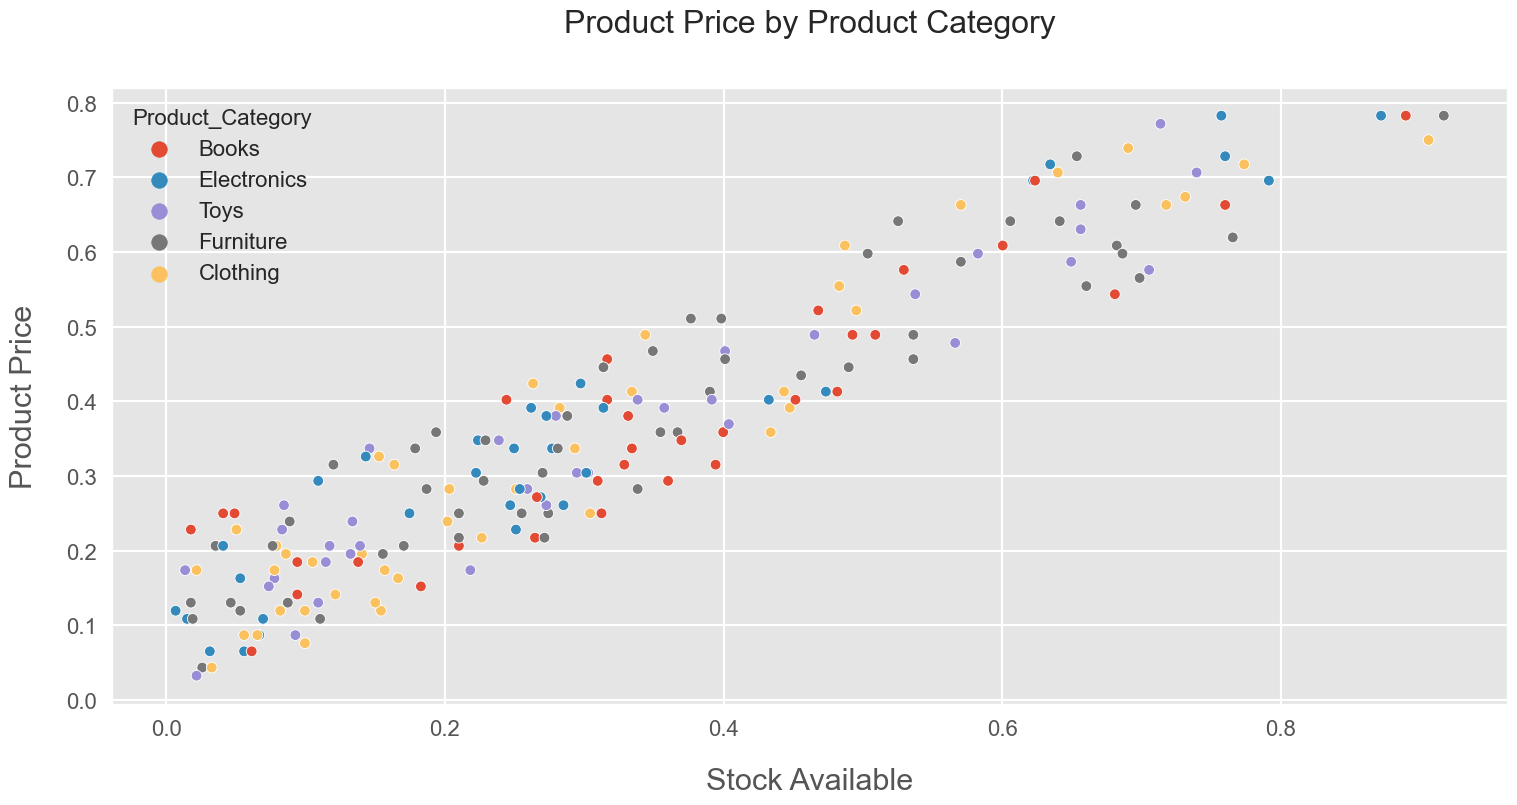

In [194]:
#stock available vs sales quantity
plt.figure(figsize=(18,8))
sns.scatterplot(data=df[:200], x='Stock_Available', y='Sales_Quantity', hue='Product_Category', s=60)
plt.xlabel('Stock Available',fontsize=22,labelpad=20)
plt.ylabel('Product Price',fontsize=22,labelpad=20)
plt.title('Product Price by Product Category',pad=40)
print()
plt.show()

### Inference on ScatterPlot 2 (Product Price vs Stock Available)
* Products in higher-priced categories are more likely to be in stock. This is supported by the fact that the points in the upper right corner of the scatter plot (which represent products in higher-priced categories) are more likely to be blue (indicating that they are in stock).
* There is a lot of variation in the price of products within each category. This is supported by the fact that there are points of all colors (indicating different stock availability statuses) in each of the four quadrants of the scatter plot.
* The stock availability of products can depend on a number of factors, such as the popularity of the product, the time of year, and the supply chain. This is supported by the fact that there are some products in each category that are in stock and some that are not. The specific factors that affect the stock availability of a particular product will vary depending on the product.

In [447]:
#Graph that's yet to be drawn
#relationship between Reorder_Point and Lead_Time
#relationship between Economic_Indicator and Product_Price


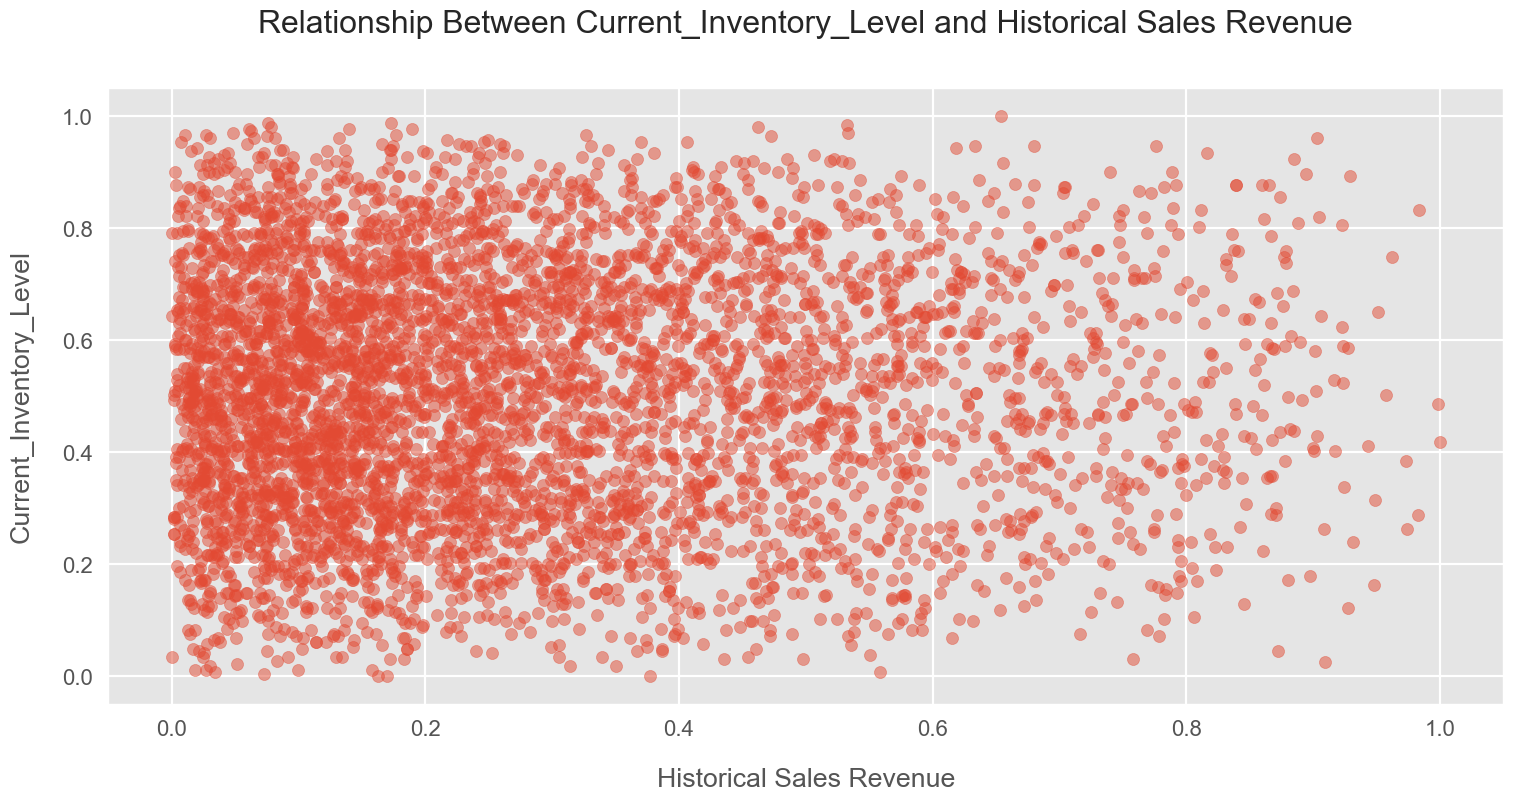

In [432]:
#Current Inventory Level vs Historical Sales Revenue
plt.figure(figsize=(18, 8))  
plt.scatter(df['Historical_Sales_Revenue'], df['Current_Inventory_Level'], alpha=0.5,s=75)  # alpha controls transparency
plt.xlabel('Historical Sales Revenue',labelpad=20)
plt.ylabel('Current_Inventory_Level',labelpad=20)
plt.title('Relationship Between Current_Inventory_Level and Historical Sales Revenue',pad=40)
print()
plt.show()

### Inference on ScatterPlot 3 (Current Inventory Level vs Historical Sales)
The graph shows that the inventory level is higher than the historical sales revenue. This is interesting because it suggests that the company may be overstocking products. This could be due to a number of factors, such as:

* The company may be forecasting demand incorrectly.
* The company may be slow to react to changes in demand.
* The company may be holding onto products that are no longer selling well.

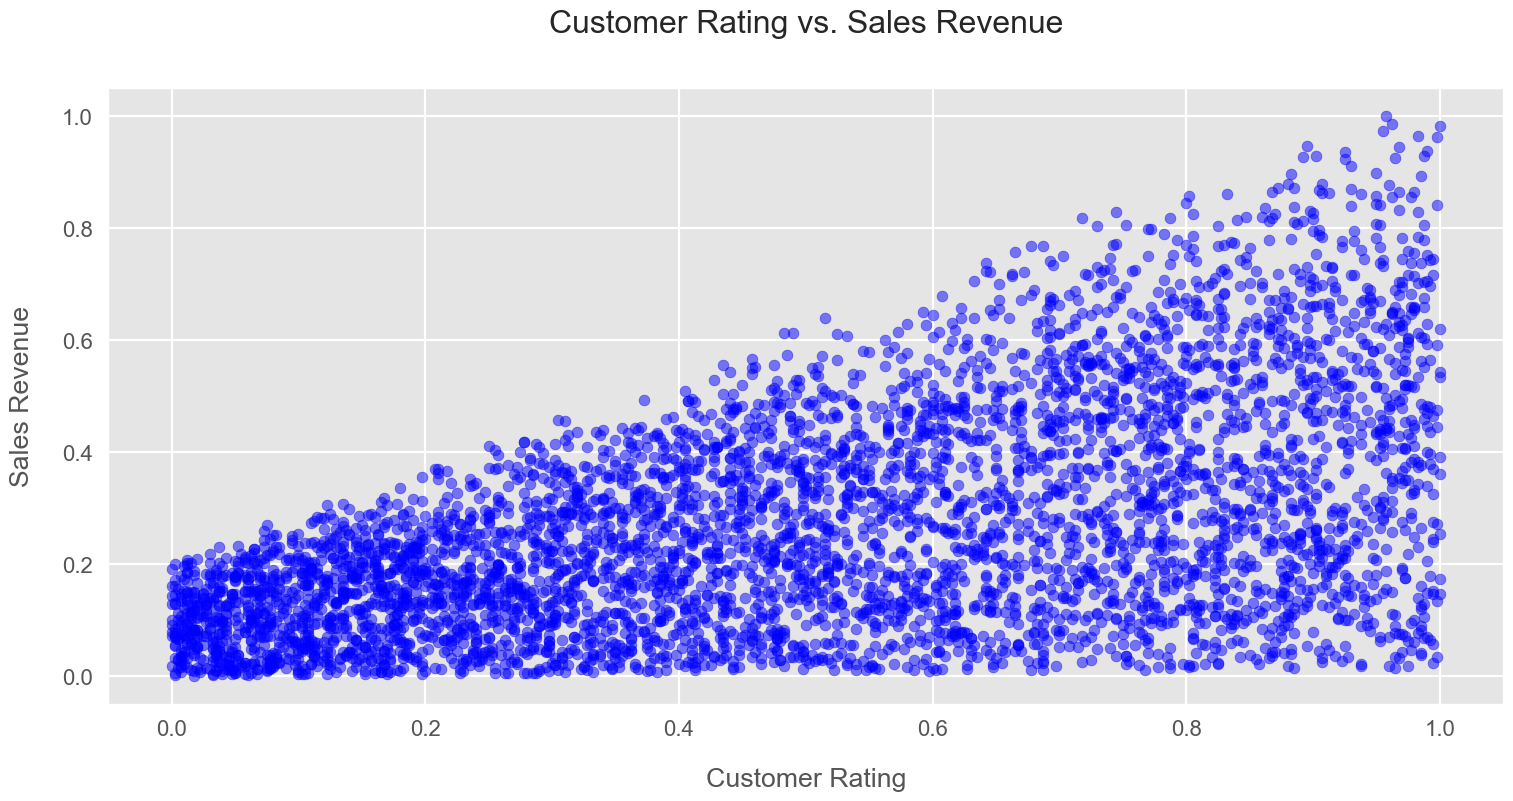

In [441]:
#Customer Rating vs Sales Revenue
plt.figure(figsize=(18, 8))
plt.scatter(df['Customer_Rating'], df['Sales_Revenue'], alpha=0.5, color='blue',s=60)
plt.xlabel('Customer Rating', labelpad=20)
plt.ylabel('Sales Revenue', labelpad=20)
plt.title('Customer Rating vs. Sales Revenue', pad=40)
print()
plt.show()

### Inference on ScatterPlot 4 (Customer Rating vs Sales Revenue)
There is a positive correlation between customer rating and sales revenue. This means that as the customer rating increases, the sales revenue also increases. However, the correlation is not very strong, as there are a few points that do not follow the trend.


* The customer rating may not be the only factor that influences sales revenue. Other factors, such as the price of the product or the availability of the product, may also be important.
* The data may be incomplete or inaccurate.
* The correlation may be weaker for certain products or in certain markets.

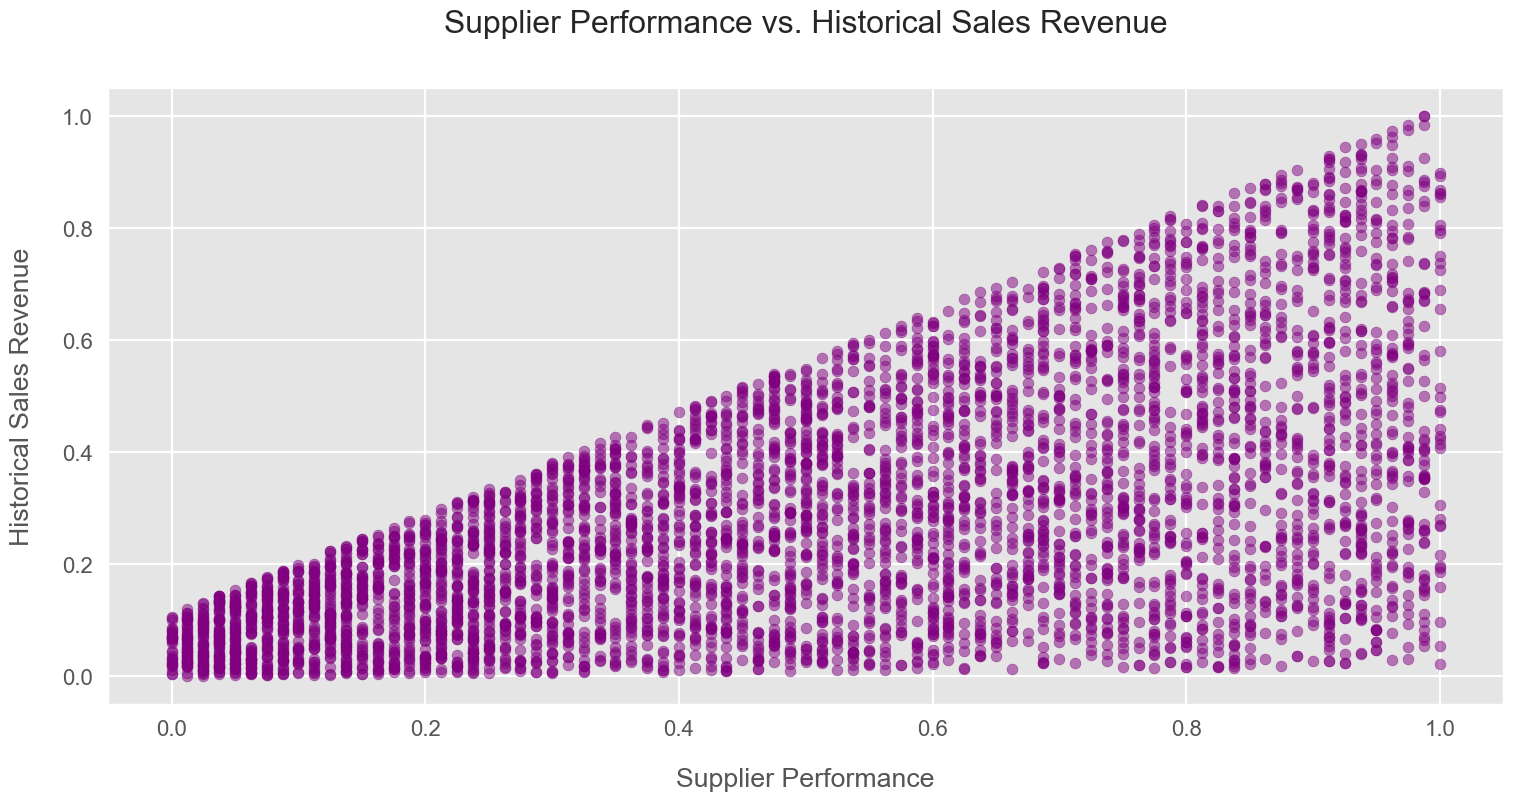

In [445]:
plt.figure(figsize=(18, 8))
plt.scatter(df['Supplier_Performance'], df['Historical_Sales_Revenue'], alpha=0.5, color='purple',s=60)
plt.xlabel('Supplier Performance', labelpad=20)
plt.ylabel('Historical Sales Revenue', labelpad=20)
plt.title('Supplier Performance vs. Historical Sales Revenue',pad=40)
print()
plt.show()

### Inference on ScatterPlot 4 (Customer Rating vs Sales Revenue)
* Supplier may have a better product or service offering.
* Supplier may have a more efficient distribution network.
* Supplier may have a better marketing strategy.
* Supplier may have a better customer relationship management (CRM) system.

In [420]:
# Values greater than 0.5 will be assigned 0, and values less than 0.5 will be assigned 1
df['Stock_Requirement'] = df['Stock_Available'].apply(lambda x: 0 if x > 0.5 else 1)
df.head()

Date  Day_of_Week  Month  Product_ID Product_Category  Product_Price  \
0  2010-01-01            4      1        4417            Books       0.032559   
1  2010-01-02            5      1        9919      Electronics       0.049046   
2  2010-01-03            6      1        5432             Toys       0.100452   
3  2010-01-04            0      1        9295      Electronics       0.099647   
4  2010-01-05            1      1        4597        Furniture       0.188382   

   Historical_Sales_Quantity  Historical_Sales_Revenue  \
0                   0.851598                  0.509274   
1                   0.319635                  0.041585   
2                   0.716895                  0.429260   
3                   0.881279                  0.046224   
4                   0.463470                  0.364083   

   Current_Inventory_Level  Reorder_Point  ...  Customer_Segmentation  \
0                 0.750842       0.123365  ...               Segment1   
1                 0.383838       0.239228  ...               Segment2   
2                 0.767677       0.068796  ...               Segment1   
3                 0.178451       0.175082  ...               Segment3   
4                 0.296296       0.409927  ...               Segment1   

  Economic_Indicator Supplier_Performance  Customer_Rating  Stock_Available  \
0              0.105               0.9625           0.8650         0.094134   
1              0.650               0.0000           0.2700         0.066849   
2              0.015               0.6000           0.7575         0.465211   
3              0.120               0.0375           0.9525         0.174625   
4              0.040               0.3625           0.4425         0.641201   

   Sales_Quantity  Promotion_Flag  Sales_Revenue  Year  Stock_Requirement  
0        0.141304               0       0.394779  2010                  1  
1        0.086957               1       0.120687  2010                  1  
2        0.489130               1       0.543894  2010                  1  
3        0.250000               0       0.300018  2010                  1  
4        0.641304               0       0.396746  2010                  0  

[5 rows x 22 columns]

## 5. Supervised Learning Models
1. Logistic Regression
2. Linear Regression
3. Knn Classification 
4. Naive Bayers
5. Decission Trees

### Training, Validation and Test Dataset 

In [219]:
train,valid,test=np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
print("Rows Division")
print("------------------------------")
print("Total Size - ",len(df),"Rows")
print("Training DataSet - ",len(train),"Rows")
print("Validation DataSet -",len(valid),"Rows")
print("Testing DataSet -",len(test),"Rows")

Rows Division
------------------------------
Total Size -  5000 Rows
Training DataSet -  3000 Rows
Validation DataSet - 1000 Rows
Testing DataSet - 1000 Rows


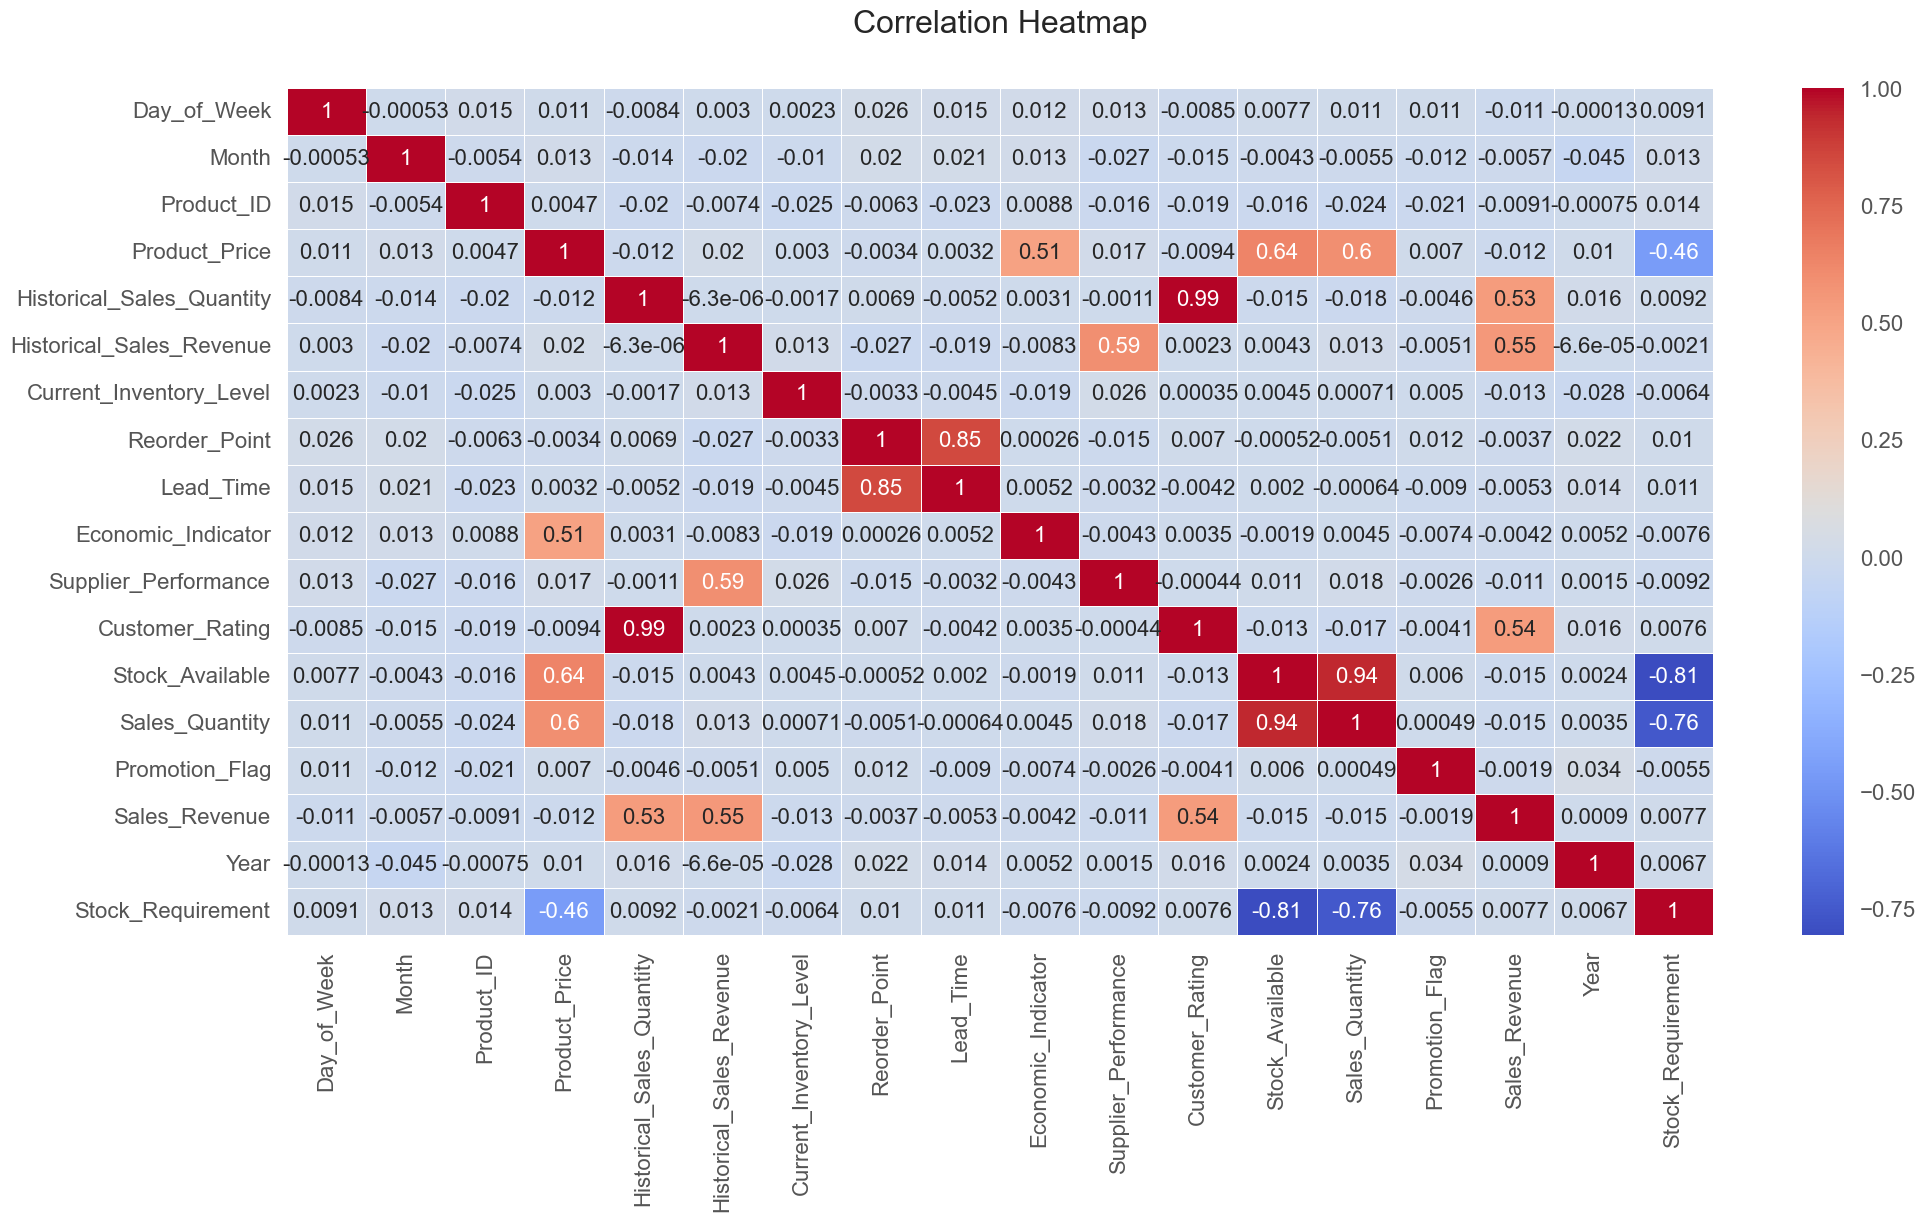

In [222]:
import warnings

# Disabling all warnings
warnings.filterwarnings("ignore")

# Calculating the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(23, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap',pad=40)
print()
plt.show()

### 1. Logistic Regression Model

In [494]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

lg_model=LogisticRegression(penalty='l2', solver='liblinear', C=0.5)
#saga - used for larger dataset

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']]
target = df['Stock_Requirement']

# Spliting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
lg_model.fit(X_train, y_train)

LogisticRegression(C=0.5, solver='liblinear')

In [495]:
print(len(df[df['Stock_Requirement'] == 0]))
print(len(df[df['Stock_Requirement'] == 1]))

1168
3832


In [496]:
y_pred = lg_model.predict(X_test)

In [497]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.929
Confusion Matrix:
[[172  49]
 [ 22 757]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       221
           1       0.94      0.97      0.96       779

    accuracy                           0.93      1000
   macro avg       0.91      0.88      0.89      1000
weighted avg       0.93      0.93      0.93      1000



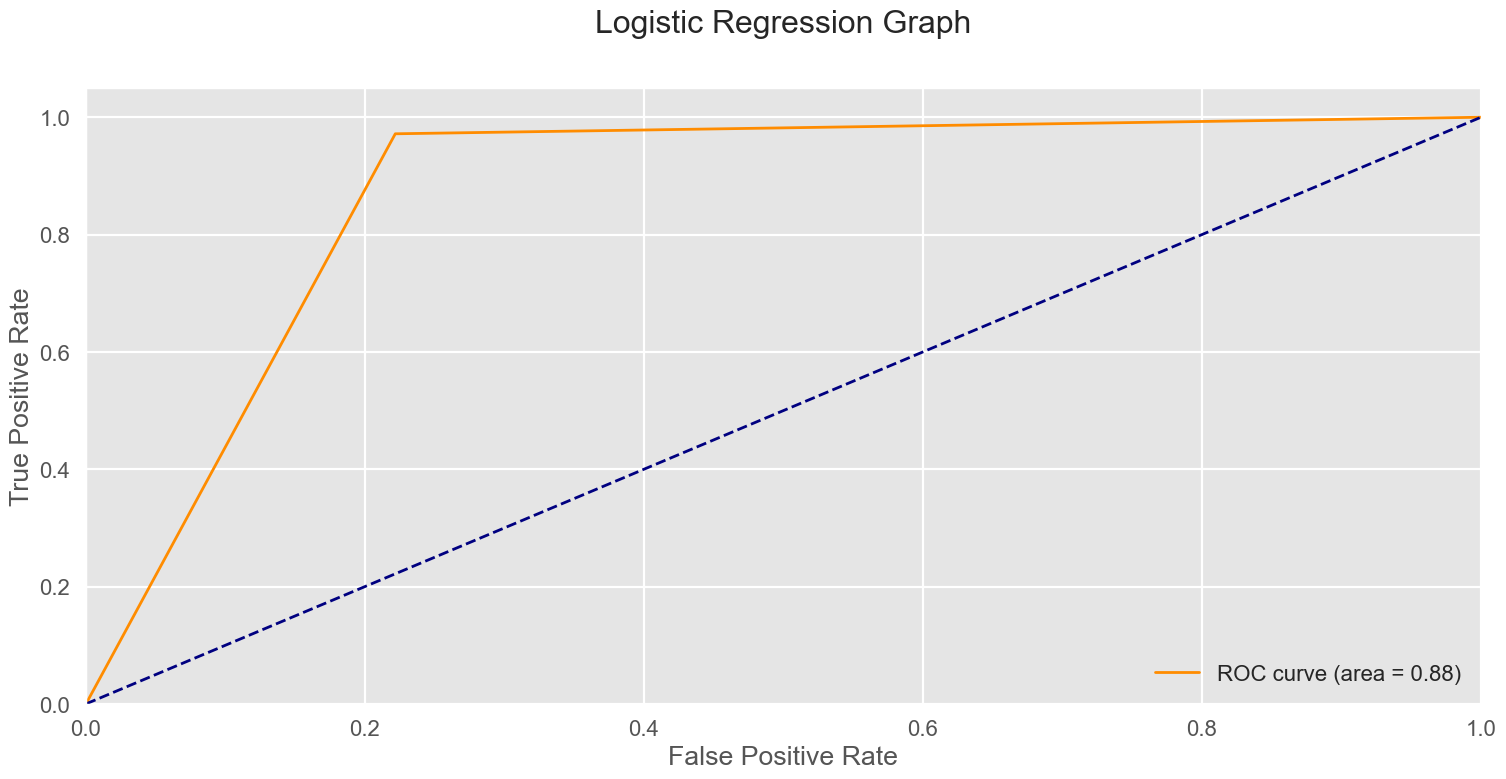

In [498]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(18, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Graph',pad=40)
plt.legend(loc='lower right')
print()
plt.show()

### Inference from the Logistic Regression
* The graph is well-labeled and easy to understand. The title of the graph is clear and concise, and the axes are labeled with the correct units.
* The curve is relatively high, which means that the model is doing a good job of identifying both positive and negative cases. The area under the curve (AUC) is 0.88, which is considered to be a good score.
* The curve is not a perfect curve, but it is not jagged or has sharp turns. This means that the model is not overfit to the training data.

### 2. linear Regression Model

In [490]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

linear_model=LinearRegression()
#saga - used for larger dataset

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']]
target = df['Stock_Available']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
linear_model.fit(X_train,y_train)

LinearRegression()

In [491]:
y_pred=linear_model.predict(X_test)
c=linear_model.intercept_
m=linear_model.coef_
print(c,m)

-0.04733687967449374 [ 0.25453261 -0.08191184  0.97585877 -0.00115113]


In [492]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')


Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.07
R-squared (R²) Score: 0.90


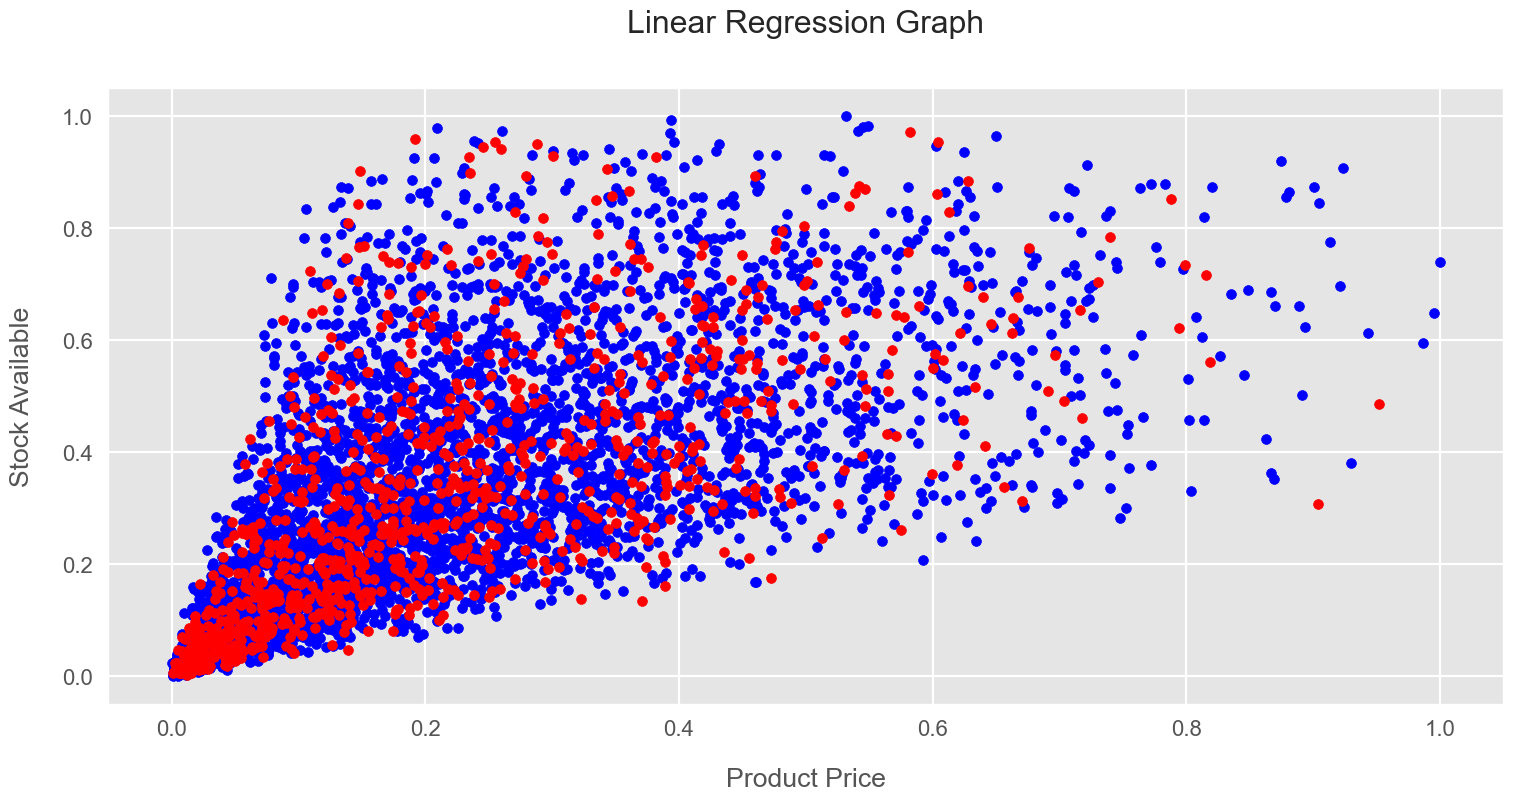

In [493]:
plt.figure(figsize=(18,8))
plt.scatter(X_train['Product_Price'],y_train,color='blue',s=50)
plt.scatter(X_test['Product_Price'],y_test,color="red",s=50)
plt.xlabel("Product Price",labelpad=20)
plt.ylabel("Stock Available",labelpad=20)
plt.title("Linear Regression Graph",pad=40)
print()
plt.show()

### Inference from the Linear Regression
The scatter plot shows that there is a positive correlation between product price and stock availability. This means that as the price of a product increases, the availability of the product also increases. However, the correlation is not very strong, as there are a few products that do not follow the trend.

There are a few possible explanations for this correlation:

* As the price of a product increases, it becomes more profitable for businesses to stock the product.
* As the price of a product increases, it becomes more likely that customers will buy the product, which increases demand and leads to businesses stocking more of the product.
* There may be other factors, such as the product's quality or the customer's perception of the brand, that are also influencing stock availability.

### 3. KNN Classification

In [486]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

k=5
knn_model=KNeighborsClassifier(n_neighbors=k)

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']] 
target = df['Stock_Requirement']

# Spliting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [487]:
y_pred = knn_model.predict(X_test)

In [488]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.92
Confusion Matrix:
[[176  45]
 [ 35 744]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       221
           1       0.94      0.96      0.95       779

    accuracy                           0.92      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.92      0.92      0.92      1000



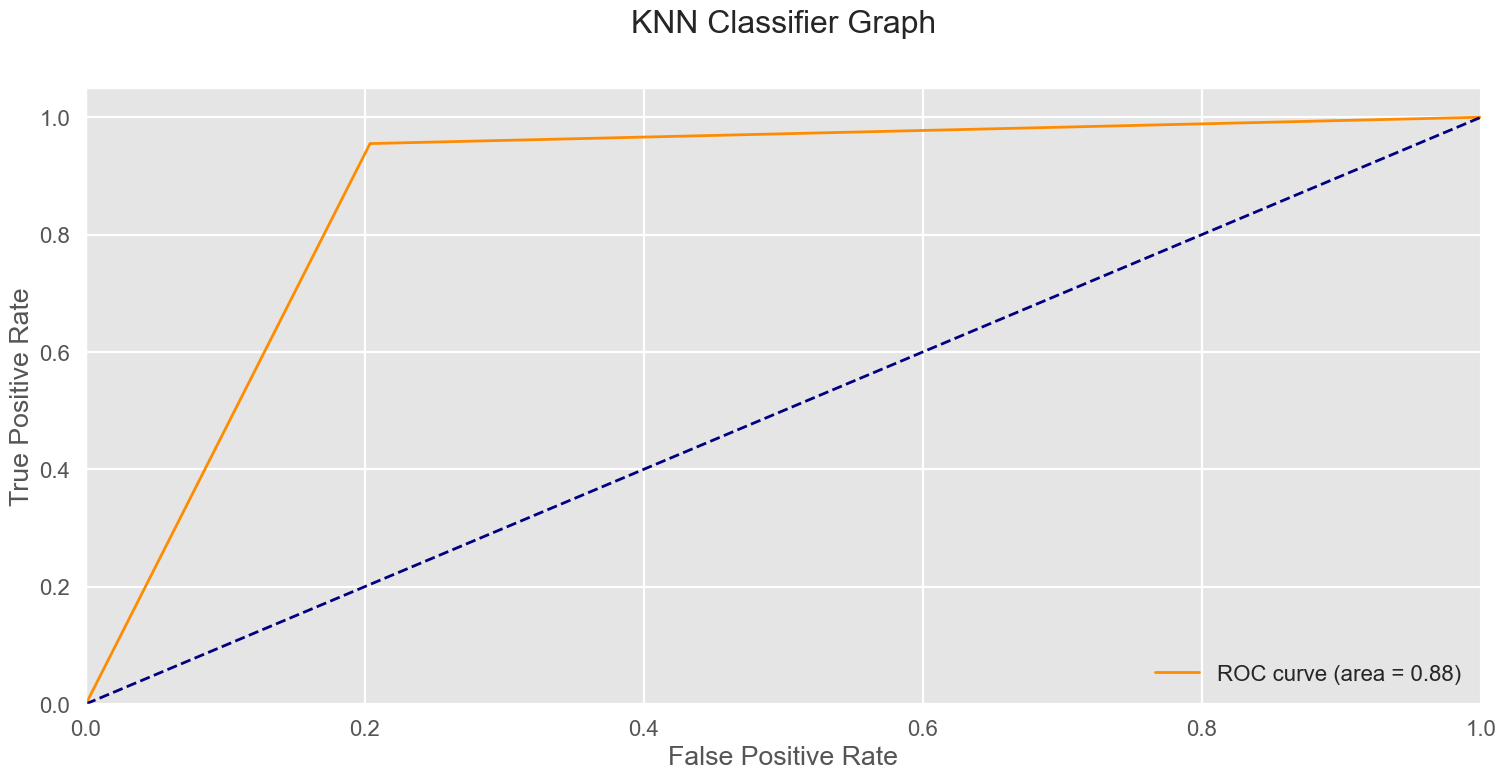

In [489]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(18, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classifier Graph',pad=40)
plt.legend(loc='lower right')
print()
plt.show()

### Inference from the KNN Classifier
* The graph shows the true positive rate and the false positive rate for different values of K. The true positive rate is the percentage of positive cases that are correctly identified as positive. The false positive rate is the percentage of negative cases that are incorrectly identified as positive.

* The graph shows that the true positive rate increases as K increases. This is because as K increases, the model becomes more conservative and is less likely to make mistakes. However, the false positive rate also increases as K increases. This is because as K increases, the model becomes more likely to miss positive cases.

### 4. Naive Bayers

In [482]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


bayers_model=GaussianNB()

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']]
target = df['Stock_Requirement']

# Spliting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
bayers_model.fit(X_train, y_train)

GaussianNB()

In [483]:
y_pred=bayers_model.predict(X_test)

In [484]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.933
Confusion Matrix:
[[189  32]
 [ 35 744]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       221
           1       0.96      0.96      0.96       779

    accuracy                           0.93      1000
   macro avg       0.90      0.91      0.90      1000
weighted avg       0.93      0.93      0.93      1000



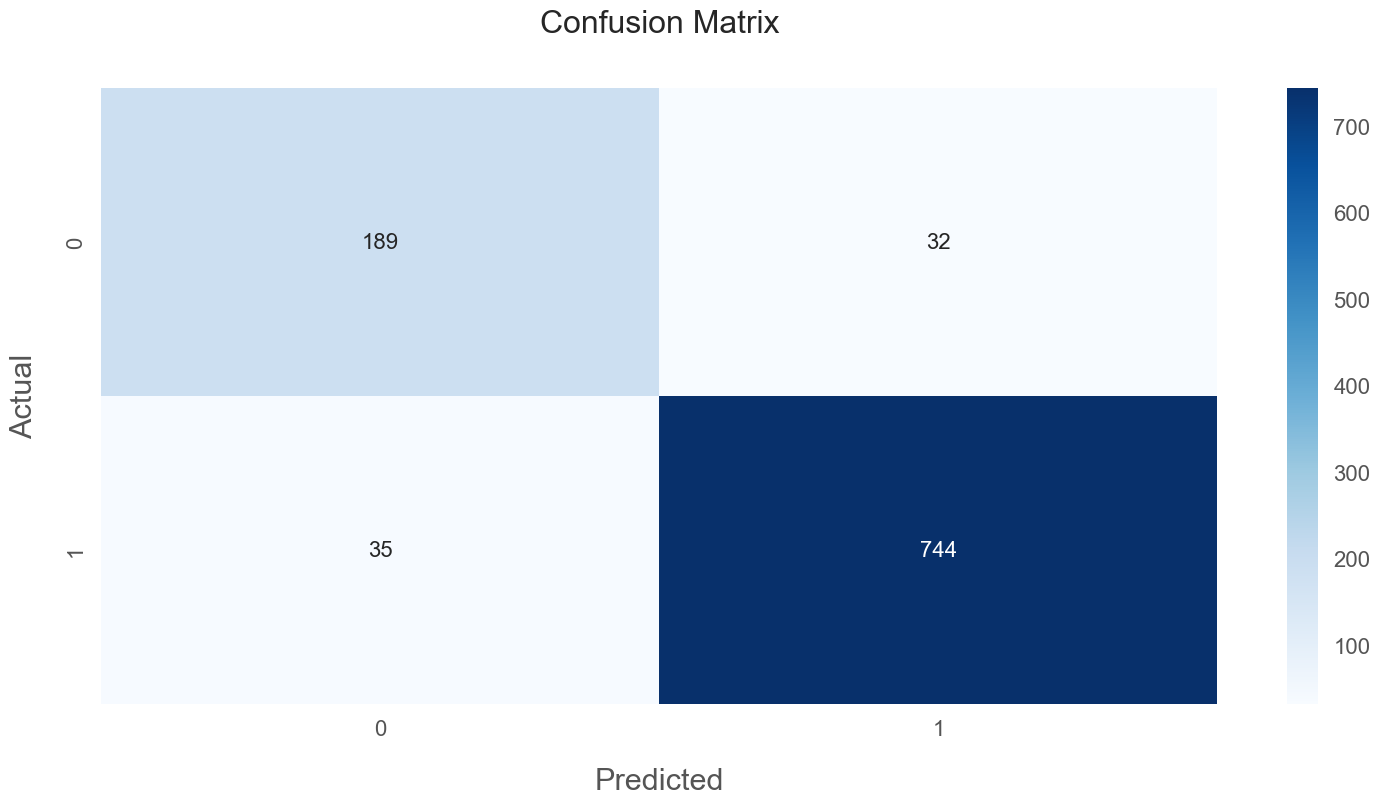

In [485]:
# Visualize the confusion matrix
plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted',fontsize=22,labelpad=20)
plt.ylabel('Actual',fontsize=22,labelpad=20)
plt.title('Confusion Matrix',pad=40)
print()
plt.show()

### Inference from the Naive Bayers Model
The confusion matrix shows that the naive Bayes classifier has a true positive rate of 0.7 and a false positive rate of 0.3. This means that the classifier is able to correctly identify 70% of the positive cases, and it is misclassifying 30% of the negative cases as positive.

This is actually a good accuracy for a naive Bayes classifier. Naive Bayes is a simple classifier that assumes that the features are independent of each other. This assumption may not be met in this dataset, but the classifier is still able to achieve a good accuracy.

* The true positive rate is high, which means that the classifier is very good at identifying positive cases.
* The false positive rate is low, which means that the classifier is not misclassifying many negative cases as positive.
* The classifier may be well-suited for this dataset, as it assumes that the features are independent of each other.

### Decision Tree Classifier
* CART MODEL

In [418]:
def gini_impurity(class_labels):
    # Count the occurrences of each class label in the dataset
    class_counts = np.bincount(class_labels)
    
    # Calculate the probability of each class
    class_probs = class_counts / len(class_labels)
    
    # Calculate the Gini impurity
    gini = 1 - np.sum(class_probs**2)
    
    return gini

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']] 
for loop in features:
    gini = gini_impurity(df[loop])
    print(f'Gini Impurity of {loop}: {gini:.4f}')

Gini Impurity of Product_Price: 0.0004
Gini Impurity of Economic_Indicator: 0.0056
Gini Impurity of Sales_Quantity: 0.0004
Gini Impurity of Sales_Revenue: 0.0004


In [470]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


cart_classifier = DecisionTreeClassifier(criterion='gini')

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']] 
target = df['Stock_Requirement']

# Spliting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
cart_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [471]:
y_pred_cart = cart_classifier.predict(X_test)

In [472]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_cart)
conf_matrix = confusion_matrix(y_test, y_pred_cart)
classification_rep = classification_report(y_test, y_pred_cart)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.907
Confusion Matrix:
[[178  43]
 [ 50 729]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       221
           1       0.94      0.94      0.94       779

    accuracy                           0.91      1000
   macro avg       0.86      0.87      0.87      1000
weighted avg       0.91      0.91      0.91      1000



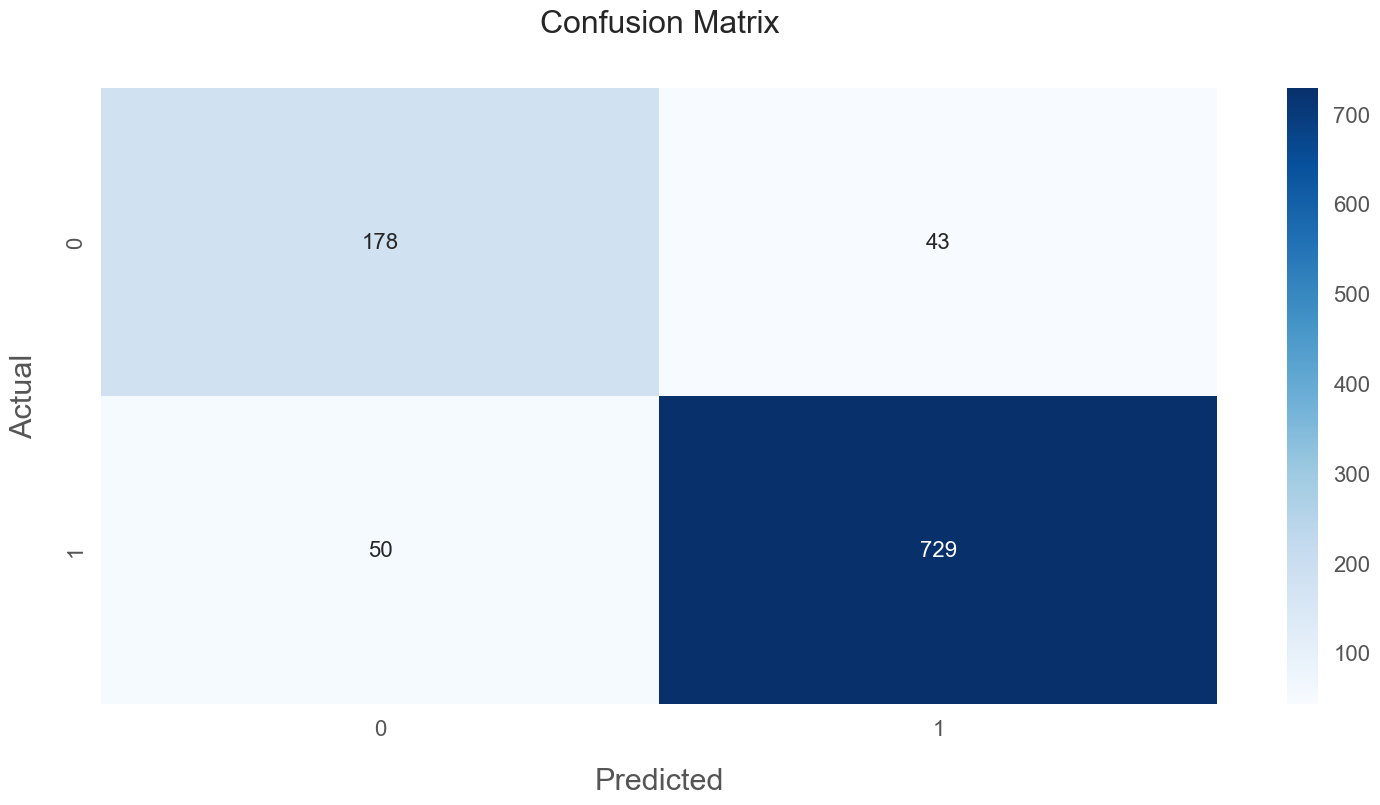

In [473]:
# Visualize the confusion matrix
plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted',fontsize=22,labelpad=20)
plt.ylabel('Actual',fontsize=22,labelpad=20)
plt.title('Confusion Matrix',pad=40)
print()
plt.show()

### Decision Tree Classifier
* ID3 MODEL

In [474]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


id3_classifier = DecisionTreeClassifier(criterion='entropy')

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']] 
target = df['Stock_Requirement']

# Spliting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
id3_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [475]:
y_pred_id3 = cart_classifier.predict(X_test)

In [476]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_id3)
conf_matrix = confusion_matrix(y_test, y_pred_id3)
classification_rep = classification_report(y_test, y_pred_id3)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.907
Confusion Matrix:
[[178  43]
 [ 50 729]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       221
           1       0.94      0.94      0.94       779

    accuracy                           0.91      1000
   macro avg       0.86      0.87      0.87      1000
weighted avg       0.91      0.91      0.91      1000



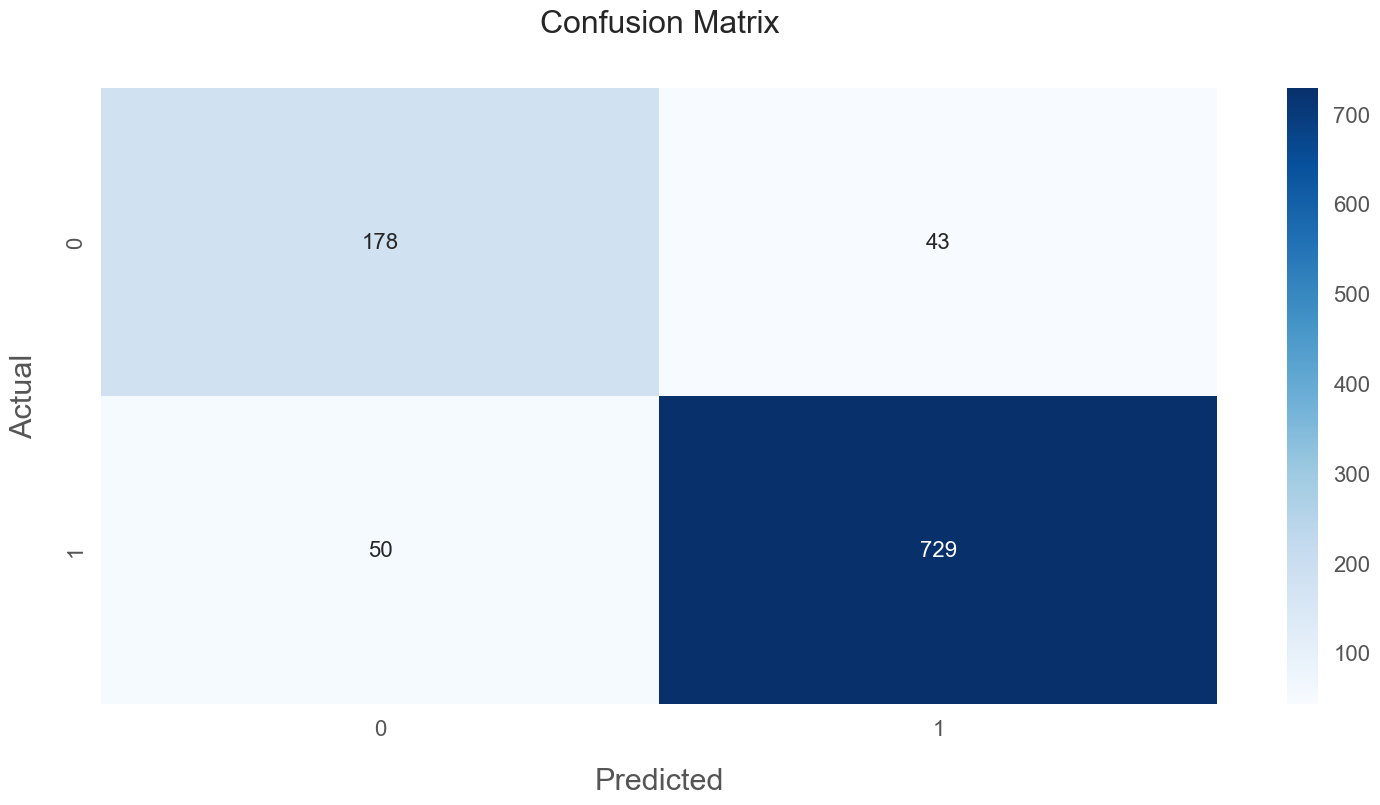

In [477]:
# Visualize the confusion matrix
plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted',fontsize=22,labelpad=20)
plt.ylabel('Actual',fontsize=22,labelpad=20)
plt.title('Confusion Matrix',pad=40)
print()
plt.show()

### Decision Tree Classifier
* C45 Classifier 

In [499]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


c45_classifier = DecisionTreeClassifier(criterion='gini', splitter='best')

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']] 
target = df['Stock_Requirement']

# Spliting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
c45_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [479]:
y_pred_c45 = c45_classifier.predict(X_test)

In [480]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_c45)
conf_matrix = confusion_matrix(y_test, y_pred_c45)
classification_rep = classification_report(y_test, y_pred_c45)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.904
Confusion Matrix:
[[176  45]
 [ 51 728]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       221
           1       0.94      0.93      0.94       779

    accuracy                           0.90      1000
   macro avg       0.86      0.87      0.86      1000
weighted avg       0.90      0.90      0.90      1000



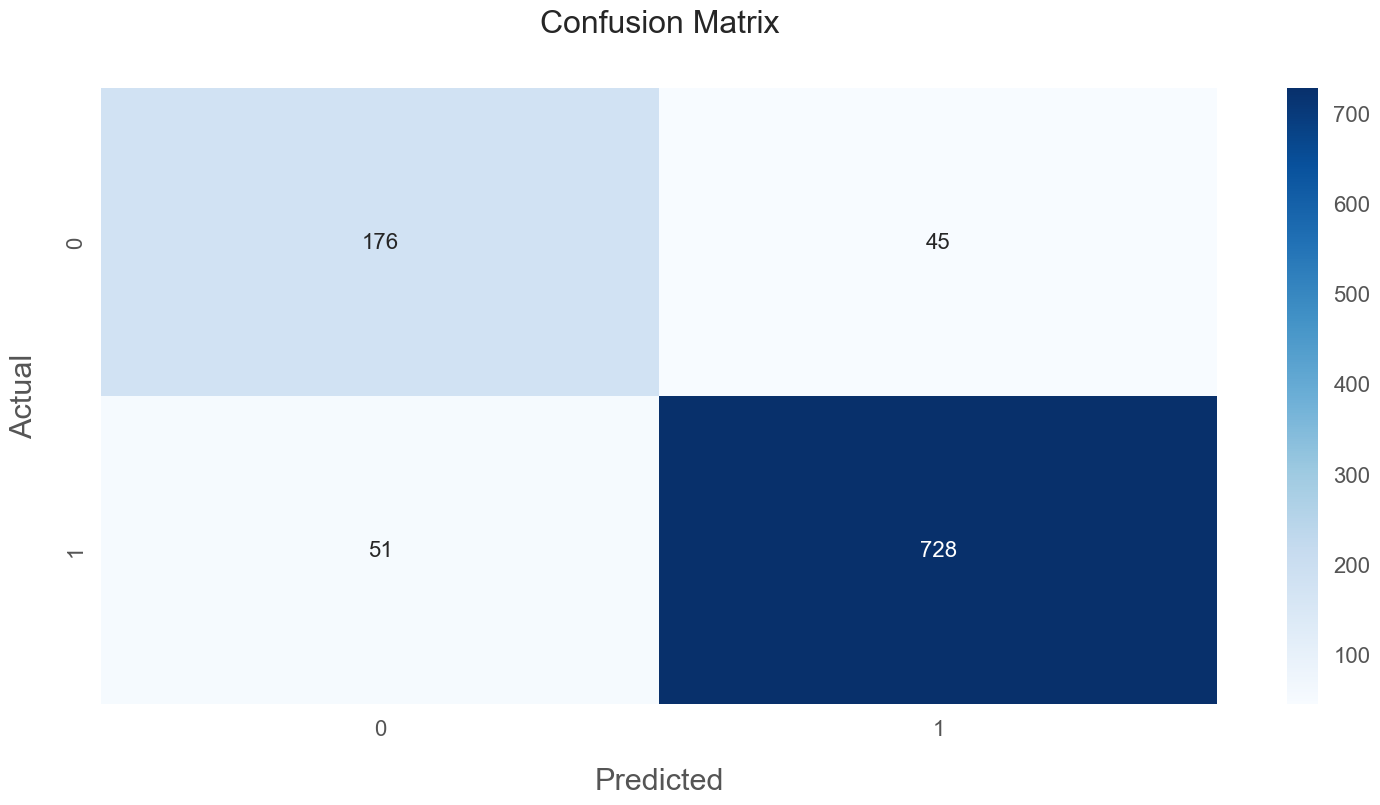

In [481]:
# Visualize the confusion matrix
plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted',fontsize=22,labelpad=20)
plt.ylabel('Actual',fontsize=22,labelpad=20)
plt.title('Confusion Matrix',pad=40)
print()
plt.show()

### Inference Based on All the 3 Approaches
* The data is not very complex and that the simple methods are able to capture the underlying relationships.
* The data is well-balanced and that there are no outliers or noise that would affect the results.
* The methods are robust and that they are not sensitive to the specific features of the data.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import datetime as dt

# Assuming df is your DataFrame and 'Sales_Quantity' is the column you want to predict
df = pd.read_csv('preprocessed_data.csv')

# Convert date to ordinal
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)

# Define the features and the target
features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']]
target = df['Stock_Available']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=0)  
model.fit(X_train, y_train)

# Use the model to predict the next 7 days
next_7_days = pd.date_range(start=df['Date'].max(), periods=7).to_series().map(dt.datetime.toordinal)
predictions = model.predict(next_7_days)

print(predictions)


C:\Users\arun2\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[719163. 719164. 719165. 719166. 719167. 719168. 719169.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.